
<h3 style = "text-align:center">Predictive Maintenance Project</h3>



## Motivation to the Project:

Prognostics and Health Management (PHM) is a type of condition-based/predictive maintenance. Prognostic maintenance will help to know the condition of equipment and to plan and perform maintenance accordingly before critical failure.

In this project, we are going to perform the machine learning model for Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation. For most complex systems like aircraft engines, finding a suitable model that allows the injection of health-related changes certainly is a challenge in itself.

Here, our main focus is on predictive maintenance which focuses on the techniques used to predict when an in-service machine will fail, so that maintenance can be planned in advance.


## Objective/Problem statement:

Here, the task of predicting the maintenance for the aircraft can be identified with different problem tasks like Regression, Binary Classification, and Multiclass classification. 

Here, Our main focus is on the Regression task which is used to predict the remaining useful component life. The remaining useful life(RUL) estimates are in the units of time (number of cycles/hours/mileage). Using the time-series data of the sensor measurements we have to come up with a machine learning algorithm that will predict the remaining useful life (RUL) of the aircraft engine.


## Dataset Details:

Source: https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan (direct download link: https://ti.arc.nasa.gov/c/6/)

The dataset is taken from the Prognostics Data Repository of NASA (National Aeronautics and Space Administration). the dataset description as follows:

<b>Description</b><br>
Engine degradation simulation was carried out using C-MAPSS. Four different sets were simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.

### Data Variables:

From the data zip file, we are taking the FD001 which has the following data variables/description about the features.

Data Set: FD001
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

This dataset contains the information about 100 run-to-failure engines. Feature description is as follows:

1)	unit number<br>
2)	time, in cycles<br>
3)	operational setting 1<br>
4)	operational setting 2<br>
5)	operational setting 3<br>
6)	sensor measurement  1<br>
7)	sensor measurement  2<br>
...<br>
26)	sensor measurement  26<br>


## Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings("ignore")

## Train Dataset

In [6]:
import pandas as pd


aircraft_train_df = pd.read_csv('CMAPSSData/train_FD001.txt', sep=' ', header=None)


aircraft_train_df = aircraft_train_df.drop([26, 27], axis=1)


aircraft_train_df.columns = [
    'engine_id', 'cycle', 'op_setting1', 'op_setting2', 'op_setting3',
    's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
    's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'
]


aircraft_train_df.head()


engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1      1      -0.0007      -0.0004        100.0  518.67  641.82   
1          1      2       0.0019      -0.0003        100.0  518.67  642.15   
2          1      3      -0.0043       0.0003        100.0  518.67  642.35   
3          1      4       0.0007       0.0000        100.0  518.67  642.35   
4          1      5      -0.0019      -0.0002        100.0  518.67  642.37   

        s3       s4     s5  ...     s12      s13      s14     s15   s16  s17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393   

    s18    s19    s20      s21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

## Test Dataset

In [11]:
import pandas as pd


aircraft_test_df = pd.read_csv('CMAPSSData/test_FD001.txt', sep=' ', header=None)


aircraft_test_df = aircraft_test_df.drop([26, 27], axis=1)


aircraft_test_df.columns = [
    'engine_id', 'cycle', 'op_setting1', 'op_setting2', 'op_setting3',
    's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
    's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'
]


aircraft_test_df.head()


engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1      1       0.0023       0.0003        100.0  518.67  643.02   
1          1      2      -0.0027      -0.0003        100.0  518.67  641.71   
2          1      3       0.0003       0.0001        100.0  518.67  642.46   
3          1      4       0.0042       0.0000        100.0  518.67  642.44   
4          1      5       0.0014       0.0000        100.0  518.67  642.51   

        s3       s4     s5  ...     s12      s13      s14     s15   s16  s17  \
0  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392   
1  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393   
2  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393   
3  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391   
4  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390   

    s18    s19    s20      s21  
0  2388  100.0  38.86  23.3735  
1  2388  100.0  39.02  23.3916  
2  2388  100.0  39.08  23.4166  
3  2388  100.0  39.00  23.3737  
4  2388  100.0  38.99  23.4130  

[5 rows x 26 columns]

## True Remaining Useful Life (RUL) values for the Test data.

In [16]:
aircraft_rul_df = pd.read_csv('CMAPSSData/RUL_FD001.txt', sep=' ', header=None)
aircraft_rul_df = aircraft_rul_df.drop([1], axis=1)
aircraft_rul_df.columns = ['time-to-failure']
aircraft_rul_df.head()


time-to-failure
0              112
1               98
2               69
3               82
4               91

## Exploratory data Analysis on the datasets

We are going to look at the details of the dataset for more insights into the collected data. The dataset is the simulated data using C-MAPSS (Commercial Modular Aero-Propulsion System Simulation). 

#### Overview on how the data is collected:

The dataset contains the Time-series measurements of various components of the Jet engine. There are Three operational settings and 21 sensor measurements for each engine. collected data contains sensor noise as well.  

In [19]:
aircraft_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_id    20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   op_setting1  20631 non-null  float64
 3   op_setting2  20631 non-null  float64
 4   op_setting3  20631 non-null  float64
 5   s1           20631 non-null  float64
 6   s2           20631 non-null  float64
 7   s3           20631 non-null  float64
 8   s4           20631 non-null  float64
 9   s5           20631 non-null  float64
 10  s6           20631 non-null  float64
 11  s7           20631 non-null  float64
 12  s8           20631 non-null  float64
 13  s9           20631 non-null  float64
 14  s10          20631 non-null  float64
 15  s11          20631 non-null  float64
 16  s12          20631 non-null  float64
 17  s13          20631 non-null  float64
 18  s14          20631 non-null  float64
 19  s15 

In [21]:
aircraft_train_df.describe()

engine_id         cycle   op_setting1   op_setting2  op_setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000      20631.0   
mean      51.506568    108.807862     -0.000009      0.000002        100.0   
std       29.227633     68.880990      0.002187      0.000293          0.0   
min        1.000000      1.000000     -0.008700     -0.000600        100.0   
25%       26.000000     52.000000     -0.001500     -0.000200        100.0   
50%       52.000000    104.000000      0.000000      0.000000        100.0   
75%       77.000000    156.000000      0.001500      0.000300        100.0   
max      100.000000    362.000000      0.008700      0.000600        100.0   

                 s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...           s12           s13           s14           s15  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

                s16           s17      s18      s19           s20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

                s21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

#### Describing the dataset 

From the description of the training dataset, we could see that the dataset contains 100 engine data with an average of 108 cycles per each engine. Over time, each engine develops a fault condition which can be predicted from sensor readings. The last cycle of each engine represents the failure/fault condition of the engine. 

## Checking for missing values 

In [23]:
aircraft_train_df.isnull().sum()

engine_id      0
cycle          0
op_setting1    0
op_setting2    0
op_setting3    0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

From the above analysis we could see that the data has no null values and the all the features are numeric !

### Histograms of the dataset variables

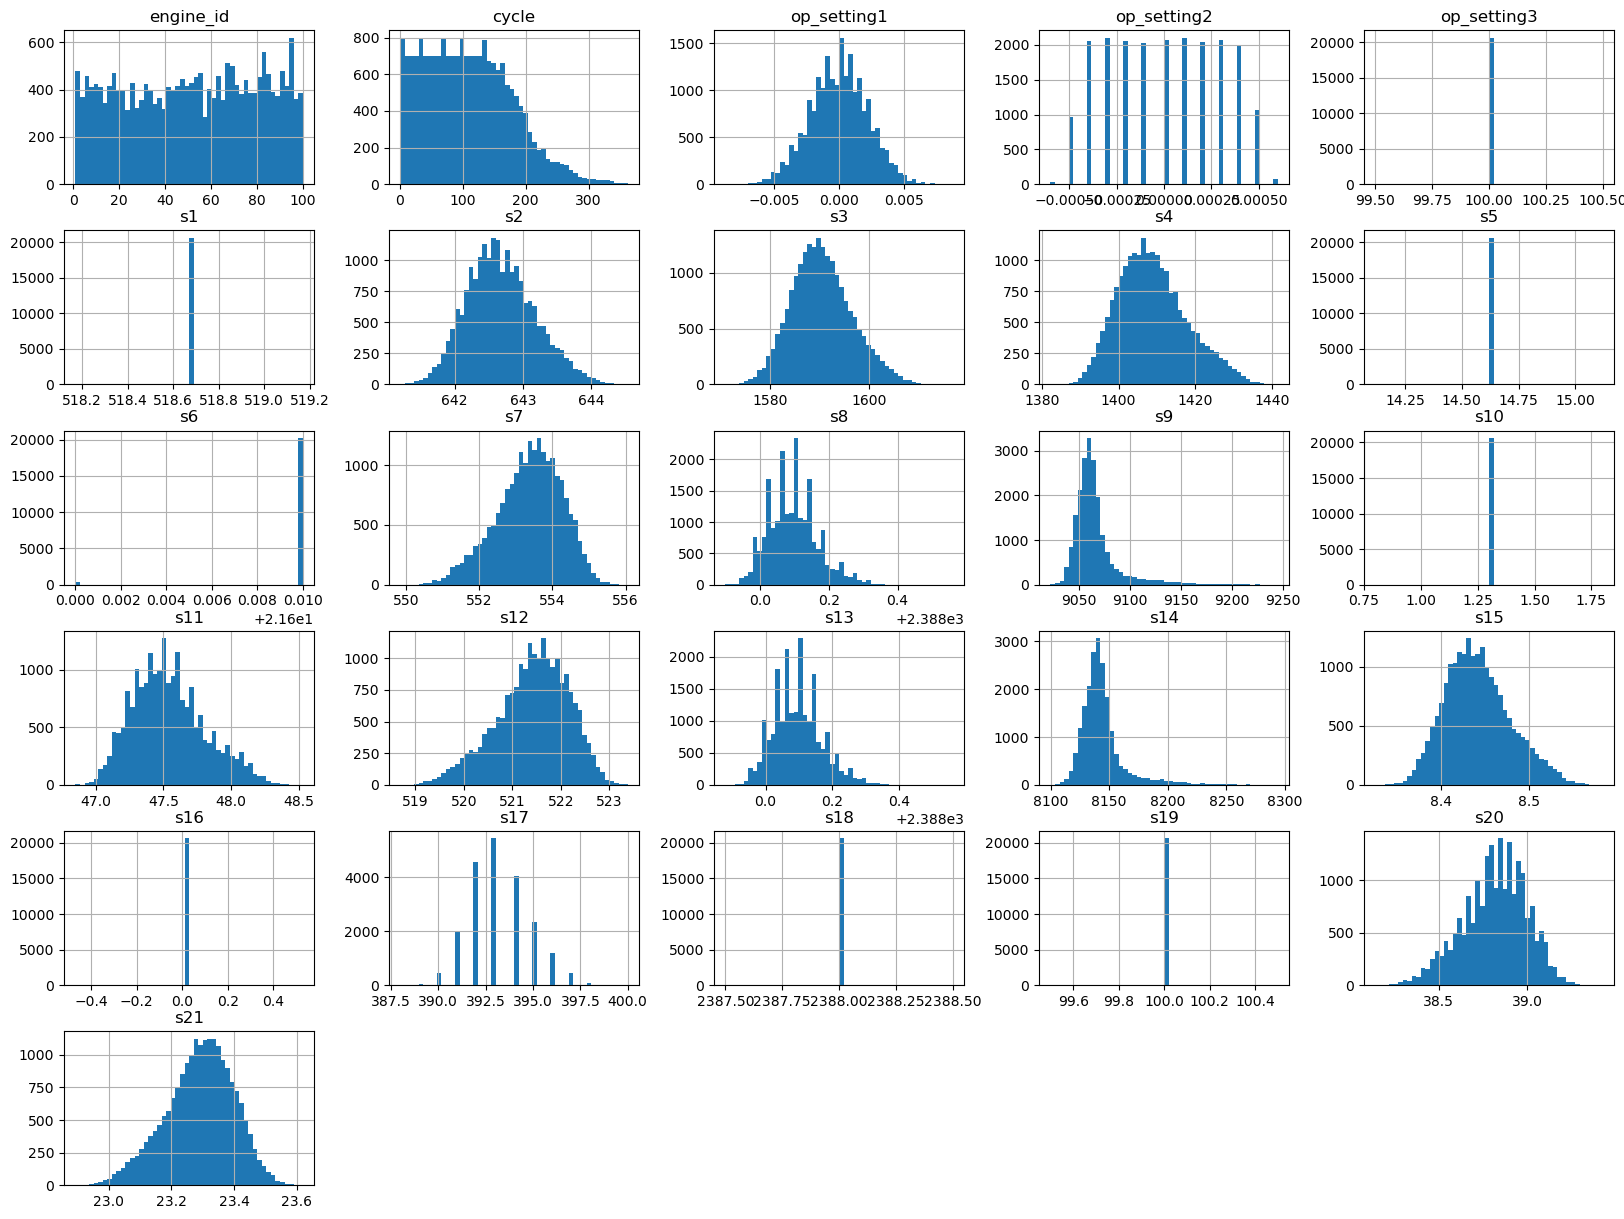

In [25]:
%matplotlib inline
aircraft_train_df.hist(bins=50, figsize=(20,15))
plt.show()

From the above figures, we could see that all the attributes are numeric and continuous variables. Only op_setting2 and S17 are discrete variables in the data. 

We can also note that some of the sensors and op_settings do not change with time. they are constant and hence they can be removed from the analysis. 

Variables that are constant with time - [ op_setting3, S1, S10, S16, S18, S19, S5, S6]. These attributes/Variables can be removed from the analysis while modeling. 


#### Mean and standard deviation of all features in terms of barplots

<Axes: title={'center': 'Mean of all columns'}>

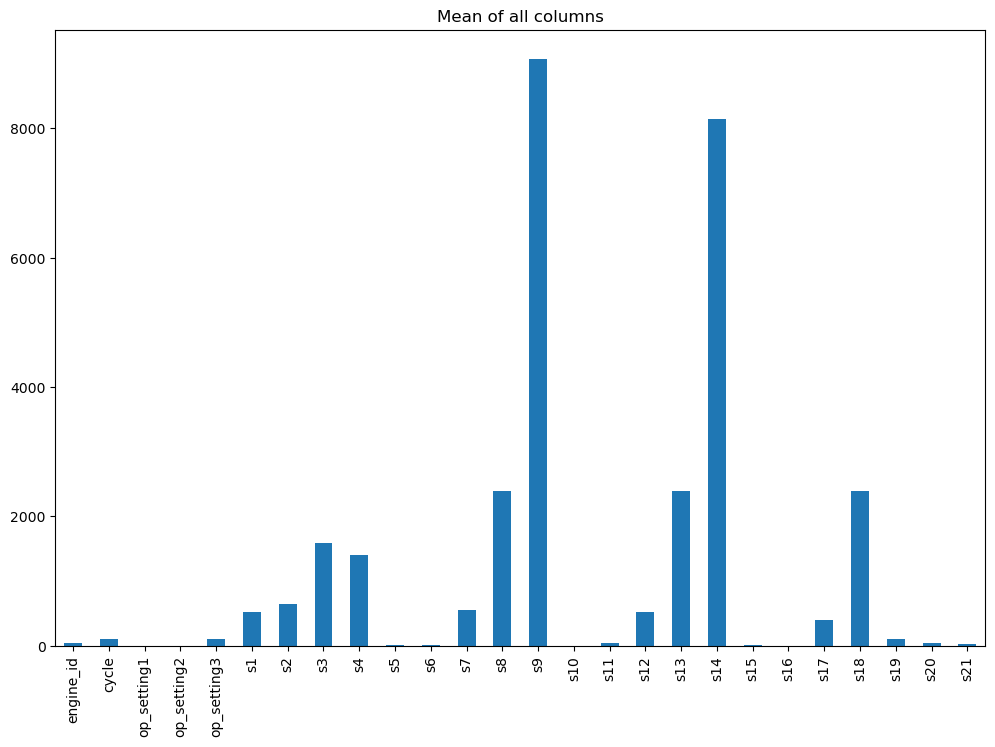

In [27]:
aircraft_train_df.mean().plot.bar(figsize=(12,8), title="Mean of all columns")

<Axes: title={'center': 'std of all columns'}>

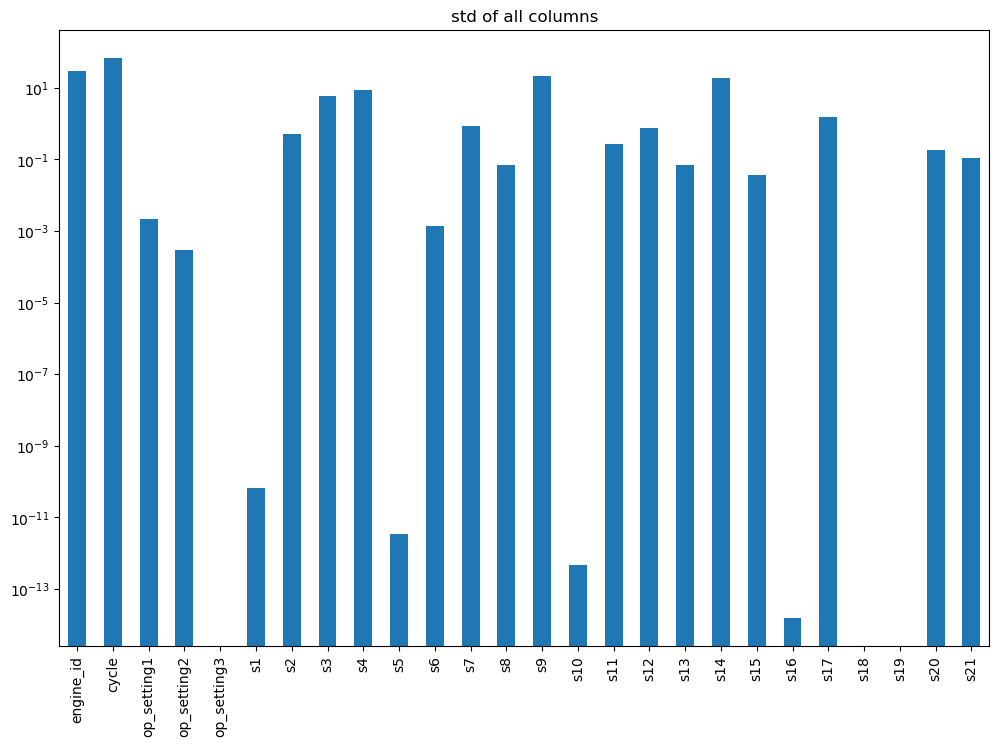

In [29]:
aircraft_train_df.std().plot.bar(figsize=(12,8),logy=True, title="std of all columns")

In [31]:
import seaborn as sns
features = aircraft_train_df[['op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
                                               's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']]
corr_plot_variables=features.corr()

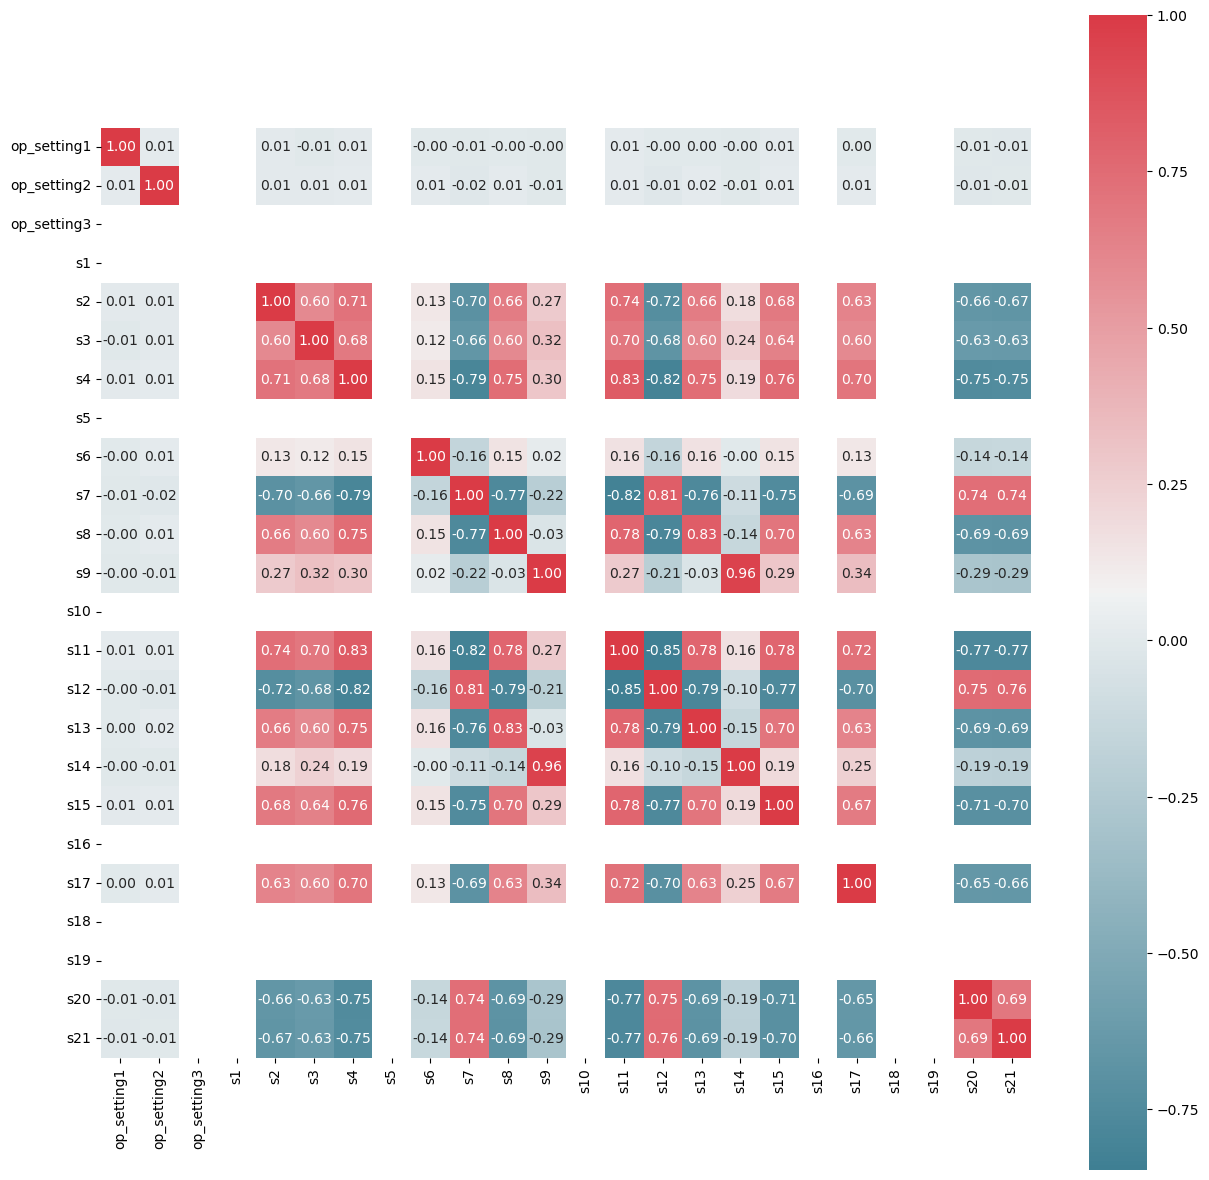

In [35]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    corr_plot_variables,
    annot=True,
    fmt='.2f',
    mask=np.zeros_like(corr_plot_variables, dtype=bool),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    ax=ax
)


From the above correlation plot between the variables, we could see some features which are constant with time are not having any correlation or they are not considered. features - op_setting3, S1, S10, S16, S18, S19, S5, S6

Form the above analysis we could say that some features are highly correlated (collinearity between the features) with each other - (S4, S12), (S7, S11), (S7, S12), (S8, S13), (S9, S14) and(S11, S12) some of these features can be ignored when we are modeling with the target variable. 


## Pre-processing of the data and Feature Extraction

#### Remaining useful life [RUL] feature extraction from the dataset.

The remaining useful life of the engine is the difference between the maximum cycle of each engine to the current cycle. RUL is the target variable for our Regression task.

#### RUL Feature Train dataset:

In [41]:
data_RUL = aircraft_train_df.groupby('engine_id')['cycle'].max().reset_index()
data_RUL.columns = ['engine_id', 'max_cycle']

print(data_RUL.head())

aircraft_train_df = pd.merge(aircraft_train_df, data_RUL, on='engine_id', how='left')

print(aircraft_train_df.columns)

aircraft_train_df['RUL'] = aircraft_train_df['max_cycle'] - aircraft_train_df['cycle']

aircraft_train_df = aircraft_train_df.drop('max_cycle', axis=1)

aircraft_train_df.head()


   engine_id  max_cycle
0          1        192
1          2        287
2          3        179
3          4        189
4          5        269
Index(['engine_id', 'cycle', 'op_setting1', 'op_setting2', 'op_setting3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
       'max_cycle_x', 'RUL', 'max_cycle_y', 'max_cycle'],
      dtype='object')


engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1      1      -0.0007      -0.0004        100.0  518.67  641.82   
1          1      2       0.0019      -0.0003        100.0  518.67  642.15   
2          1      3      -0.0043       0.0003        100.0  518.67  642.35   
3          1      4       0.0007       0.0000        100.0  518.67  642.35   
4          1      5      -0.0019      -0.0002        100.0  518.67  642.37   

        s3       s4     s5  ...     s15   s16  s17   s18    s19    s20  \
0  1589.70  1400.60  14.62  ...  8.4195  0.03  392  2388  100.0  39.06   
1  1591.82  1403.14  14.62  ...  8.4318  0.03  392  2388  100.0  39.00   
2  1587.99  1404.20  14.62  ...  8.4178  0.03  390  2388  100.0  38.95   
3  1582.79  1401.87  14.62  ...  8.3682  0.03  392  2388  100.0  38.88   
4  1582.85  1406.22  14.62  ...  8.4294  0.03  393  2388  100.0  38.90   

       s21  max_cycle_x  RUL  max_cycle_y  
0  23.4190          192  191          192  
1  23.4236          192  190          192  
2  23.3442          192  189          192  
3  23.3739          192  188          192  
4  23.4044          192  187          192  

[5 rows x 29 columns]

#### RUL feature for Test Dataset 

For the Test Dataset, we have around 13096 instances that can be used for testing. We are extracting the remaining useful life of an engine for all the instances. Once the RUL is extracted we can use that as a testing dataset. <br>
As per the dataset description in the training set, the fault grows in magnitude until system failure. In the test set, the time series ends sometime before system failure. The objective is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Provided a vector of true Remaining Useful Life (RUL) values for the test data we are reducing the test set to the exact True RUL cycles.

In [46]:
valid_data = pd.DataFrame(aircraft_test_df.groupby('engine_id')['cycle'].max()).reset_index()
valid_data.columns = ['engine_id', 'last_cycle']

df_truth_data = pd.merge(aircraft_test_df, valid_data, on='engine_id')
df_truth_data = df_truth_data[df_truth_data['cycle'] == df_truth_data['last_cycle']]
df_truth_data = df_truth_data.drop(['last_cycle'], axis=1)
df_truth_data.reset_index(drop=True, inplace=True)

df_truth_data = pd.concat([df_truth_data, aircraft_rul_df], axis=1)
df_test_data = df_truth_data.rename(columns={'time-to-failure': 'RUL'})


In [48]:
df_test_data.head()

engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1     31      -0.0006       0.0004        100.0  518.67  642.58   
1          2     49       0.0018      -0.0001        100.0  518.67  642.55   
2          3    126      -0.0016       0.0004        100.0  518.67  642.88   
3          4    106       0.0012       0.0004        100.0  518.67  642.78   
4          5     98      -0.0013      -0.0004        100.0  518.67  642.27   

        s3       s4     s5  ...      s13      s14     s15   s16  s17   s18  \
0  1581.22  1398.91  14.62  ...  2388.06  8130.11  8.4024  0.03  393  2388   
1  1586.59  1410.83  14.62  ...  2388.09  8126.90  8.4505  0.03  391  2388   
2  1589.75  1418.89  14.62  ...  2388.14  8131.46  8.4119  0.03  395  2388   
3  1594.53  1406.88  14.62  ...  2388.11  8133.64  8.4634  0.03  395  2388   
4  1589.94  1419.36  14.62  ...  2388.15  8125.74  8.4362  0.03  394  2388   

     s19    s20      s21  RUL  
0  100.0  38.81  23.3552  112  
1  100.0  38.81  23.2618   98  
2  100.0  38.93  23.2740   69  
3  100.0  38.58  23.2581   82  
4  100.0  38.75  23.4117   91  

[5 rows x 27 columns]

## Correlation analysis with Target variable

In [51]:
for col in aircraft_train_df.columns:
    aircraft_train_df[col] = pd.to_numeric(aircraft_train_df[col],errors='coerce')
corr_m = aircraft_train_df.corr()
corr_m['RUL'].sort_values(ascending=False)

RUL            1.000000
s12            0.671983
s7             0.657223
s21            0.635662
s20            0.629428
max_cycle_y    0.363152
max_cycle_x    0.363152
engine_id      0.078753
op_setting2   -0.001948
op_setting1   -0.003198
s6            -0.128348
s14           -0.306769
s9            -0.390102
s13           -0.562569
s8            -0.563968
s3            -0.584520
s17           -0.606154
s2            -0.606484
s15           -0.642667
s4            -0.678948
s11           -0.696228
cycle         -0.736241
op_setting3         NaN
s1                  NaN
s5                  NaN
s10                 NaN
s16                 NaN
s18                 NaN
s19                 NaN
Name: RUL, dtype: float64

## Visualizations of the Data

### Distribution plots of all variables with respective to the Target variable

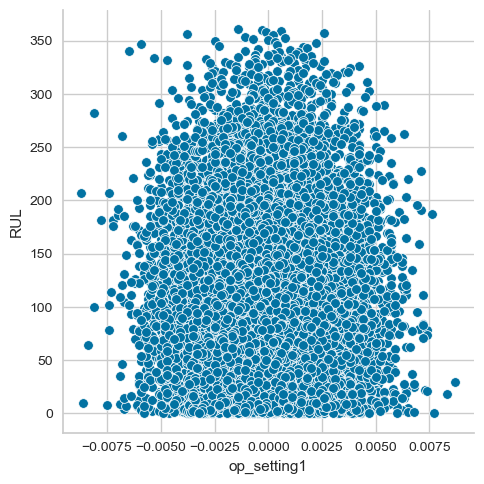

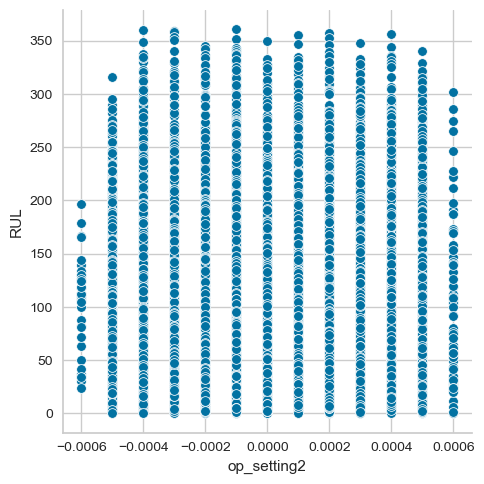

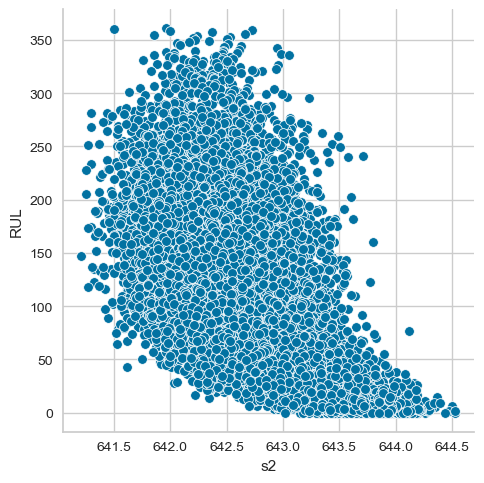

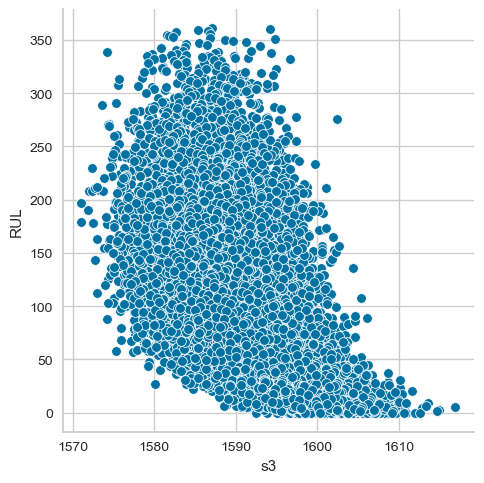

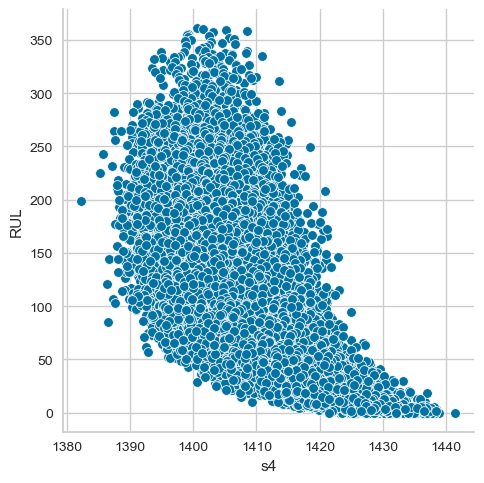

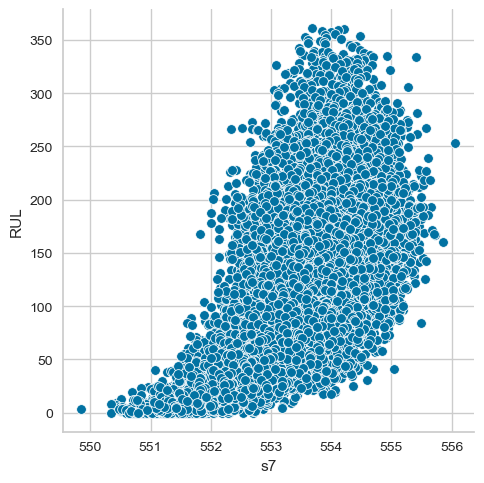

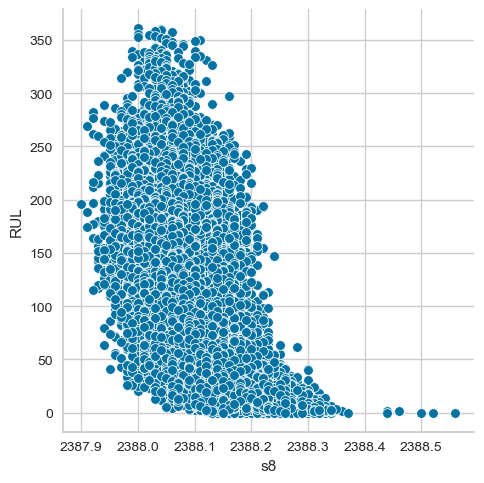

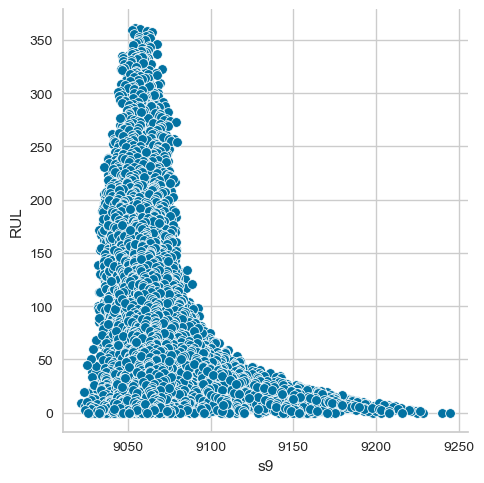

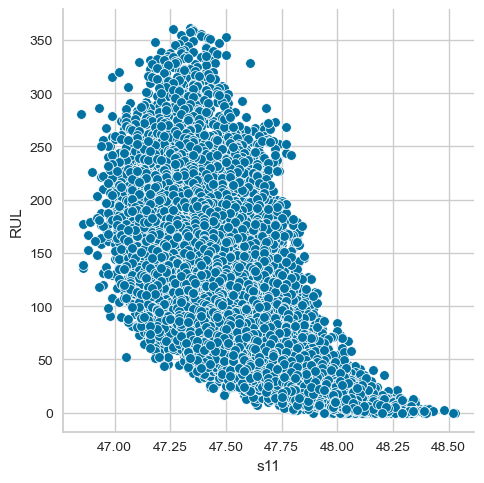

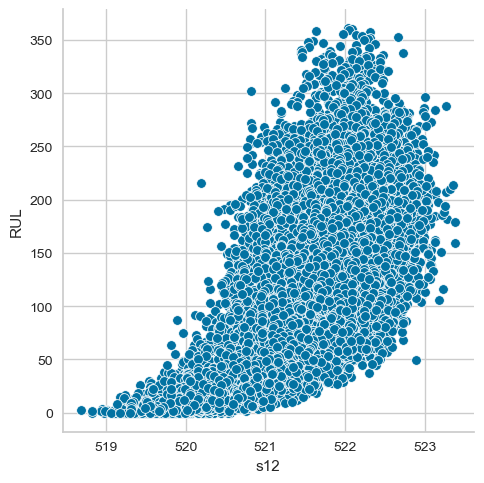

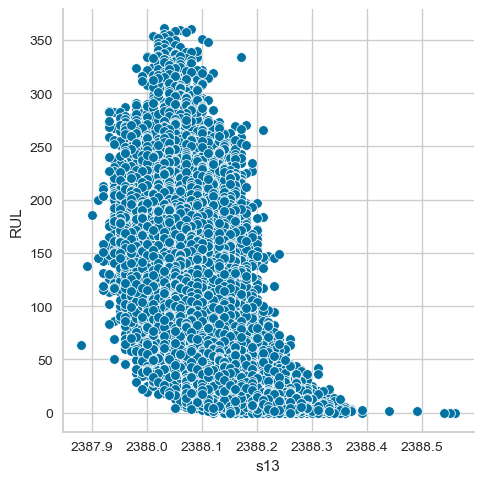

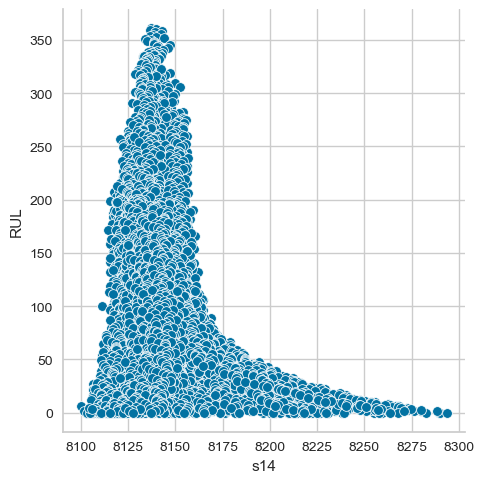

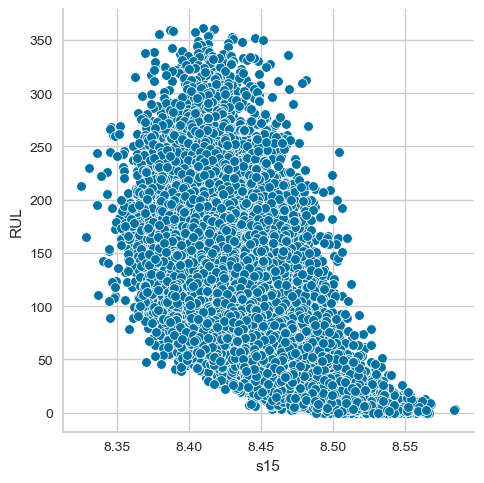

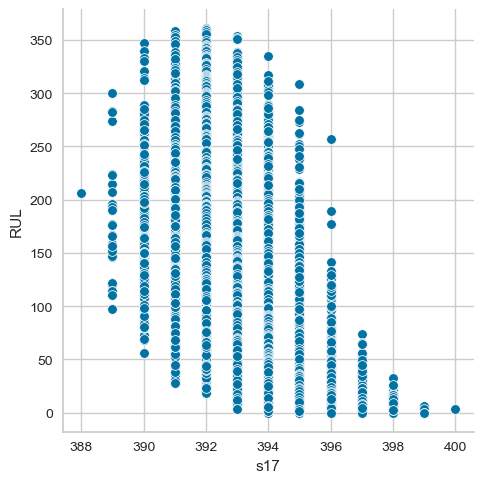

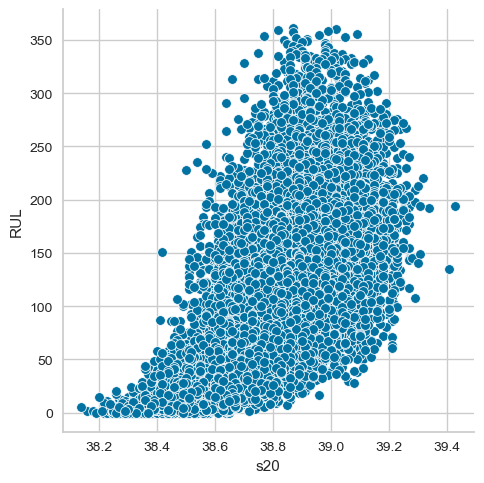

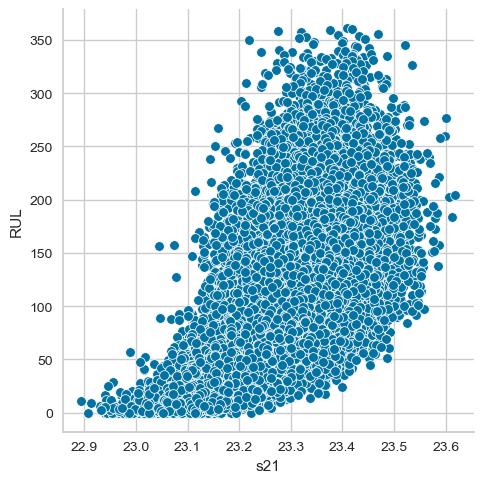

In [210]:
attributes = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11',
                                               's12','s13','s14','s15','s17','s20','s21']
for i in range(len(attributes)):
    sns.relplot(x=attributes[i], y="RUL", data=aircraft_train_df)

### Scatter Plot visualizations of the attributes with each other. 

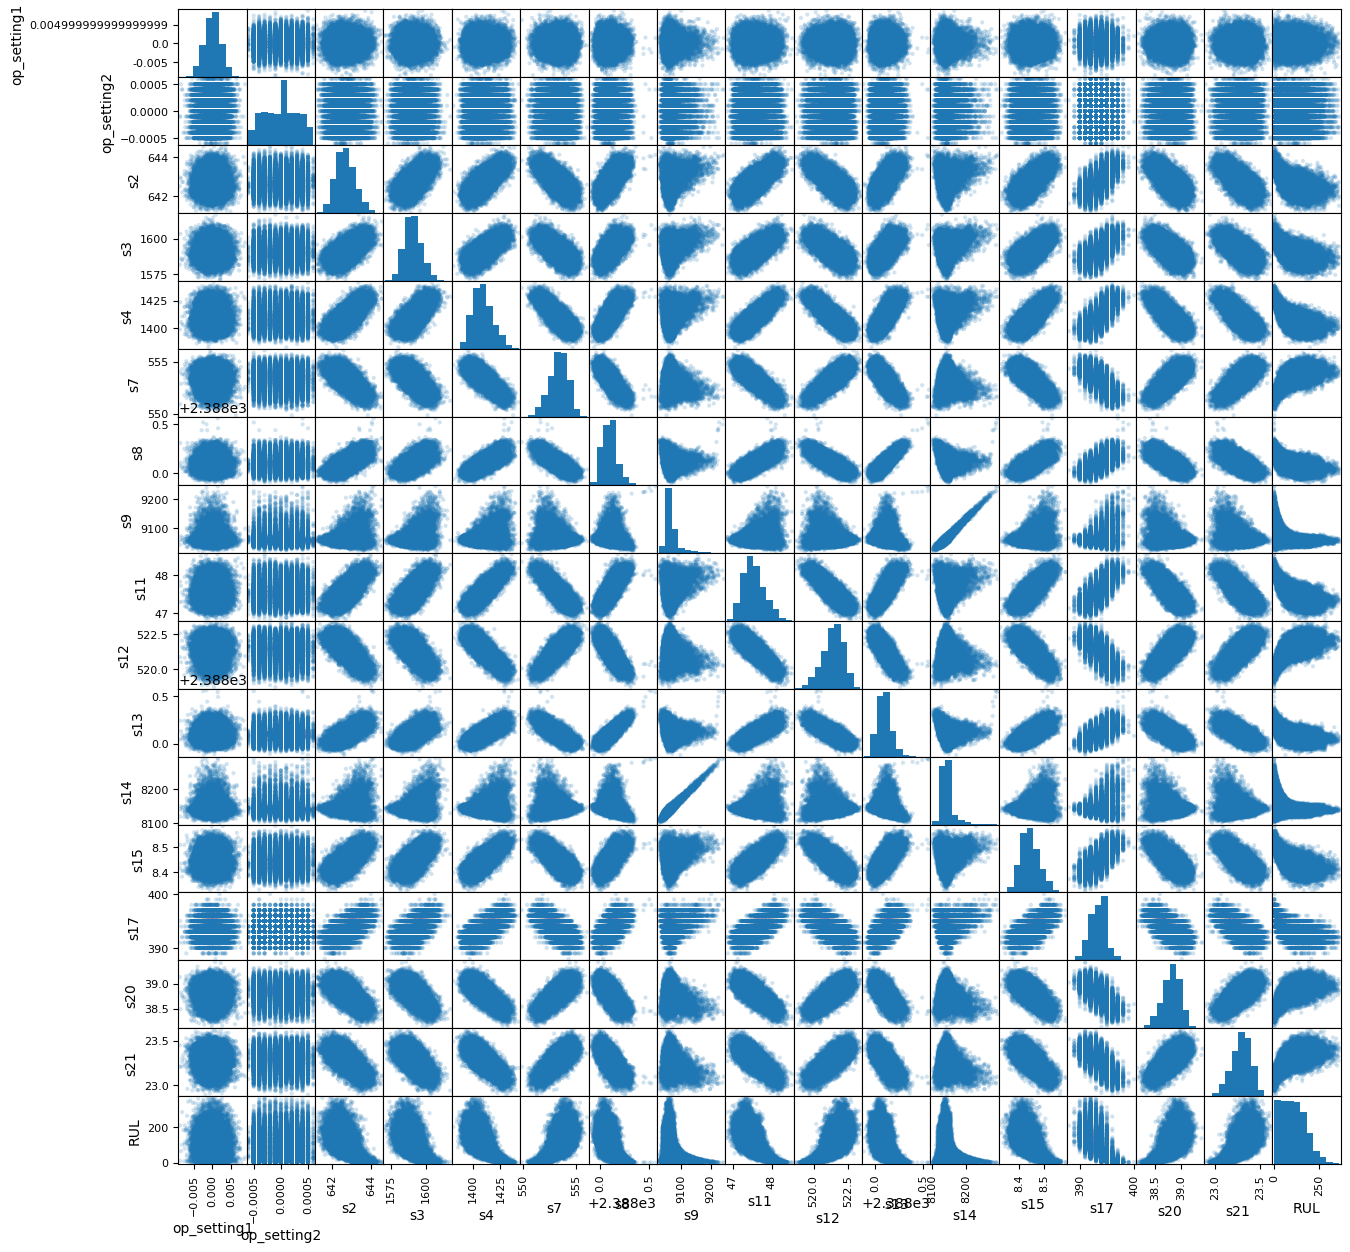

In [55]:
from pandas.plotting import scatter_matrix
attributes = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11',
                                               's12','s13','s14','s15','s17','s20','s21','RUL']
fig = scatter_matrix(aircraft_train_df[attributes],alpha=0.2, figsize=(15, 15))
plt.show()

From the scatter plots we could see that the data is distributed normally few variables are skewed. The relationship with the target variable is not linear for most of the variables. Most of the variables are non-linear with the target variable RUL.

### Sensor data Visualizations for some random engines

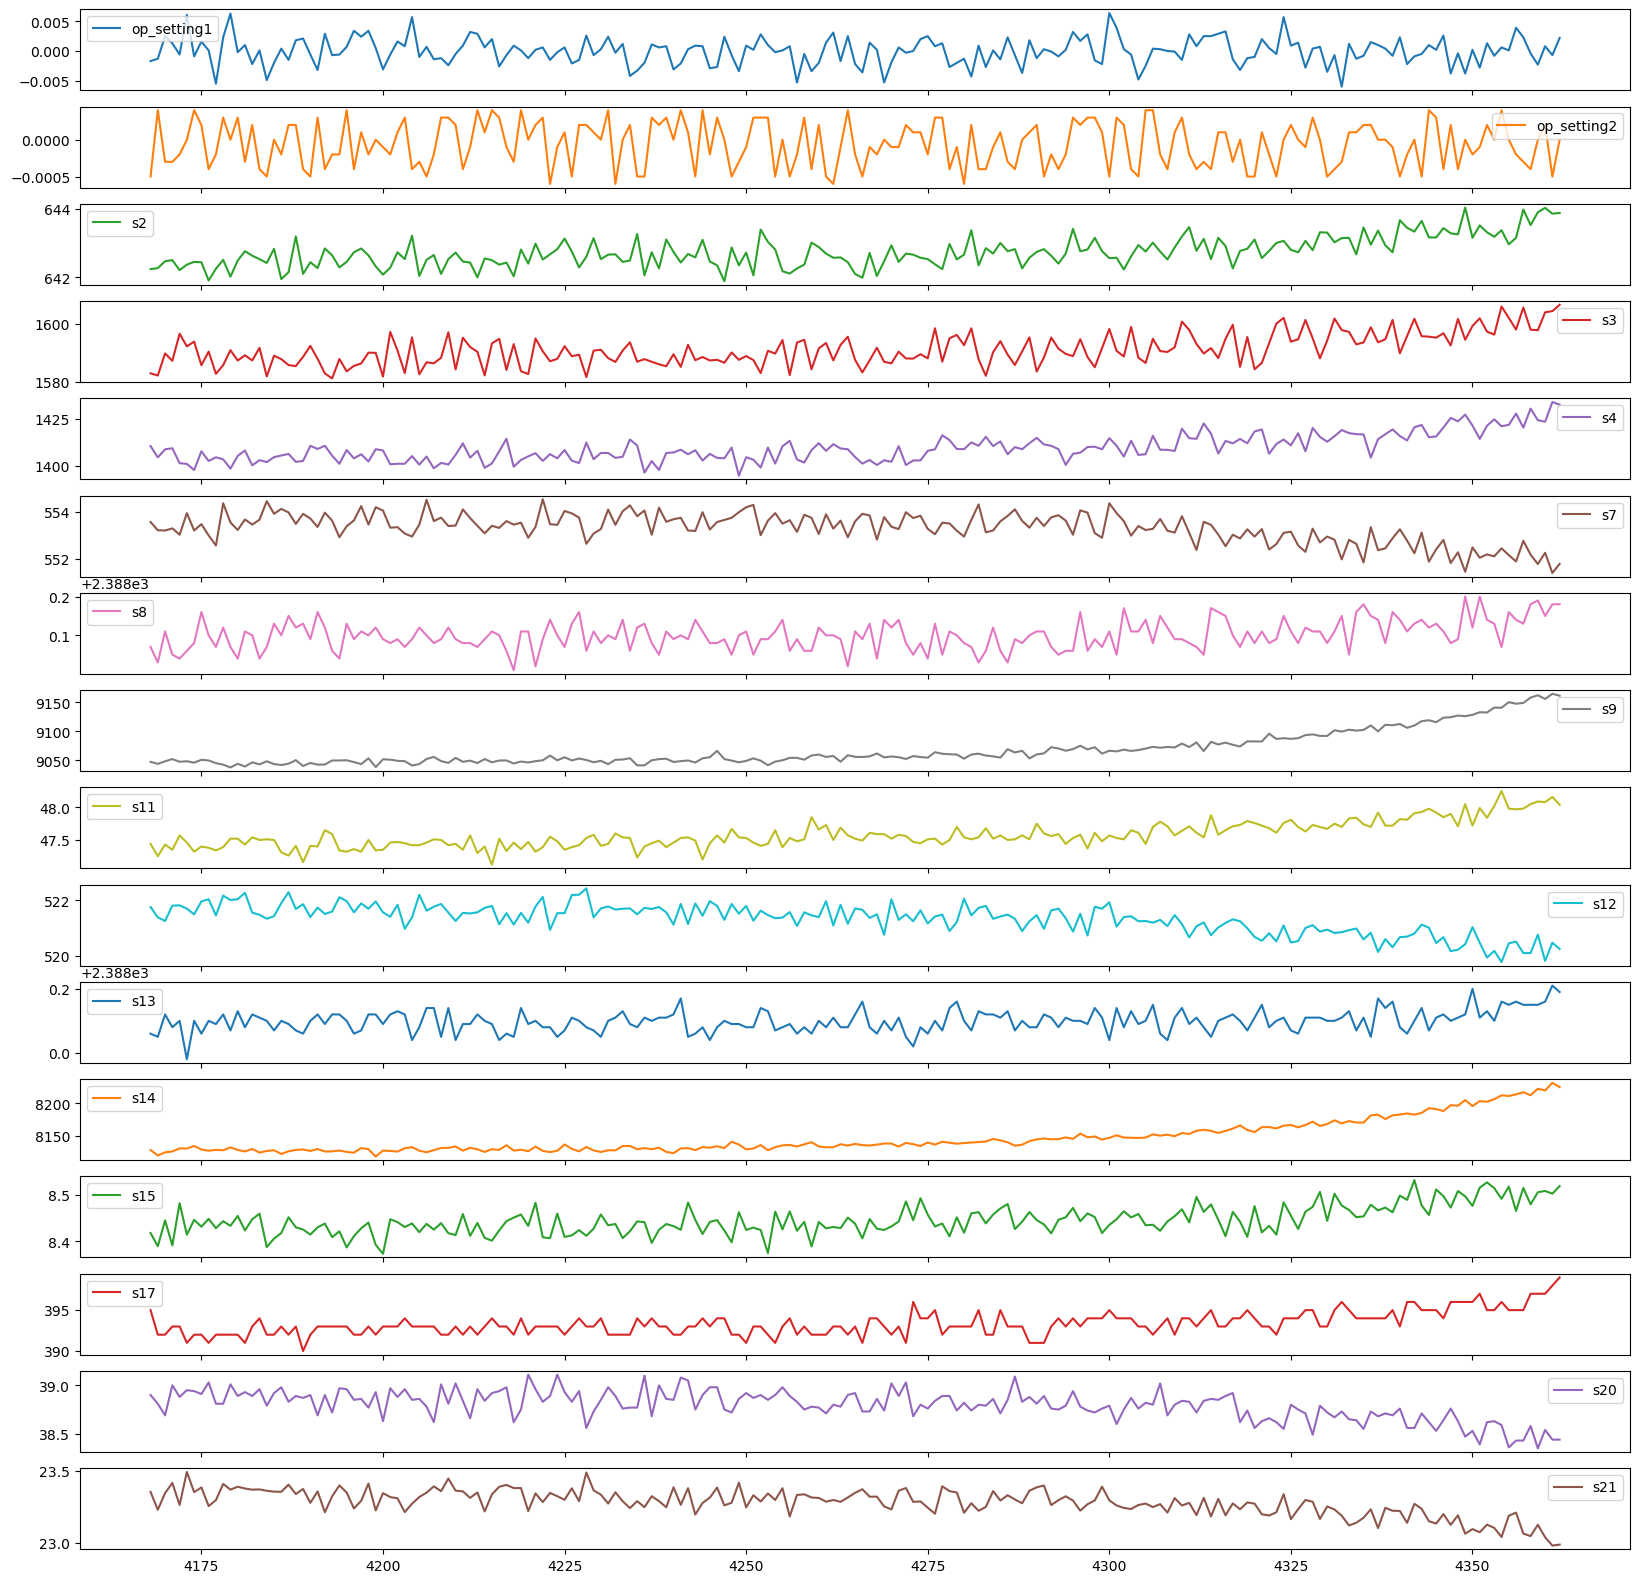

In [57]:
engine_id_21 = aircraft_train_df[aircraft_train_df['engine_id'] == 21]


feature_col = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']
engine_id_21 = engine_id_21[feature_col]
engine_id_21_plot = engine_id_21.plot(subplots=True, sharex=True, figsize=(20,20))

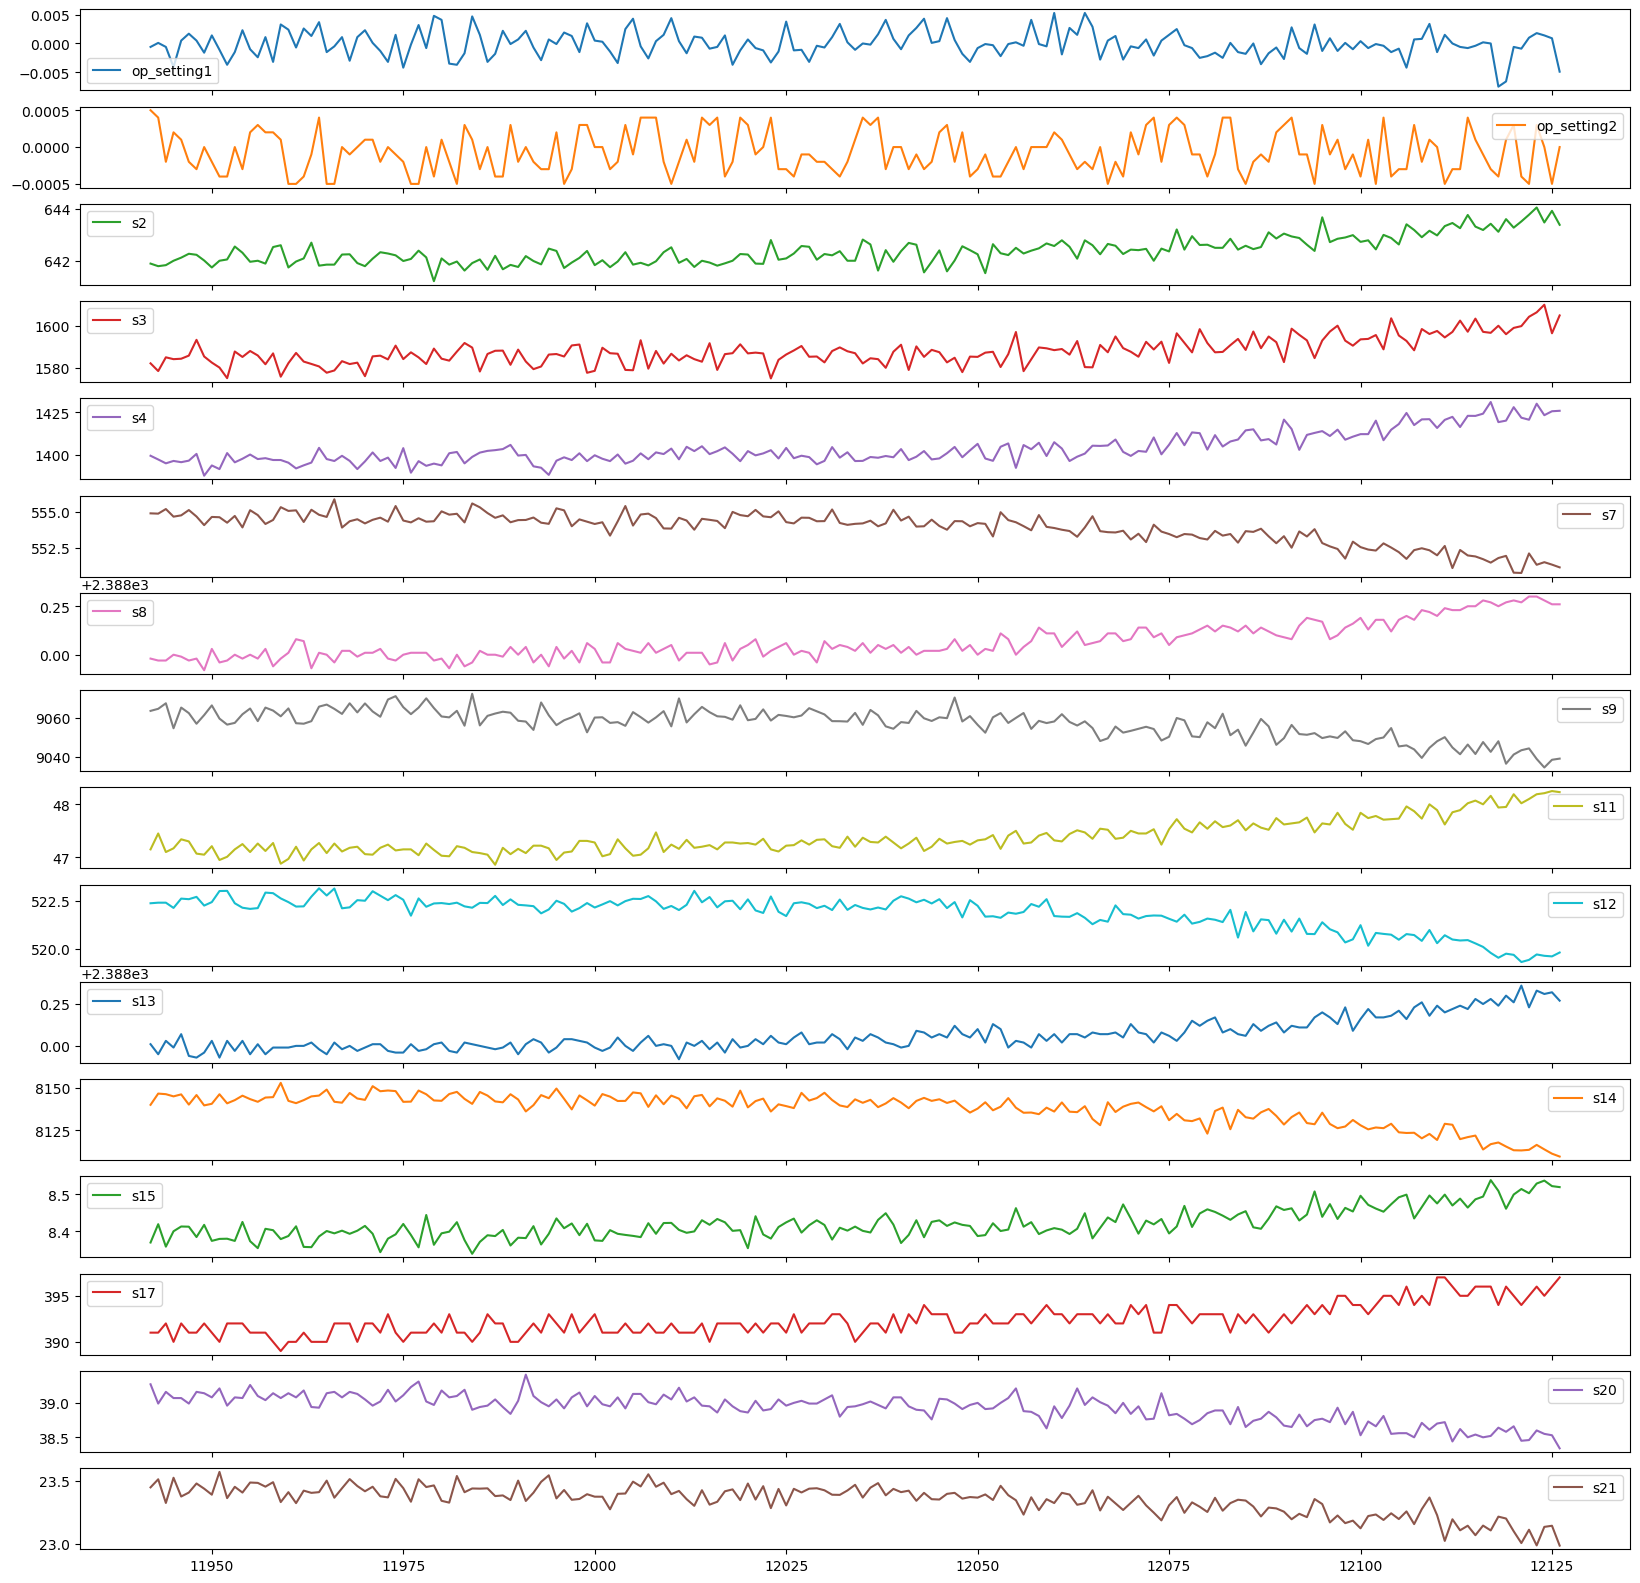

In [59]:
engine_id_61 = aircraft_train_df[aircraft_train_df['engine_id'] == 61]
engine_id_61 = engine_id_61[feature_col]
engine_id_61_plot = engine_id_61.plot(subplots=True, sharex=True, figsize=(20,20))

## Modelling 

Remaining Useful Life estimation with RUL models considers the following categories and the RUL models are useful when the historical data and information is available:

1. Run to failure histories of machines similar to machines which is will be diagnosed. 
2. A known threshold value of some condition indicator that indicates the failure. 
3. Data about how much time it took for a similar machine to reach failure. 

RUL estimation models provide methods for training the model using historical data and using it for performing prediction of the remaining useful life.

similarity models are one of the RUL estimation model, where RUL prediction of a test machine can be done on the known behavior of similar machines from a historical database. Such models compare a trend in test data or condition-indicator values to the same information extracted from a similar system.

Here, the Regression task is to predict the remaining useful component of life. The remaining useful life estimates are in the units if time (cycles/hours/mileage). We have used Linear and non - linear models to predict the Time To Failure of a machine.

### Regression anaylysis

1. <b>Linear Regression:</b> It is a statistical process for estimating the relationship between dependent variable (target) and one or more independent variables. This method is also called the least-squares regression, the most common method for fitting the regression line is the method of least squares. linear regression calculates the best-fitting line for the observed data by minimizing the sum of the squares of vertical deviations forms each data point to the line. 

2. <b>Decision tree Regression:</b> Decision tree is a hierarchical model that splits the dataset into several branches taking the maximum information from each split. Regression Tress are used for continuous output, In the regression tree, the value is obtained by the terminal nodes in the training data is the mean response of the observation. 

3. <b>Polynomial Regression:</b> It is a statistical method of regression analysis in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial in x.

4. <b>Lasso Regression:</b> It is a type of Linear Regression that used shrinkage, the data values are shrunk towards a central point. It minimizes the sum of the squared errors and also penalizing the L1 norm of the coefficients. 

5. <b>RandomForest Regression:</b> RandomForest is a ensemble method of regression trees. The regression trees run in parallel and there is no interaction between these trees while building the trees. RandomForest regression trees output the mean prediction of the individual trees. 

6. <b>LGBM Regression</b> LightGBM is a gradient boosting tree-based learning algorithm which is distributed and efficient. It is designed to have faster training speed, efficiency, low memory usage, better accuracy and it is capable of handling large datasets. 

7. <b>XGBoost Regressor</b> XGBoost is an optimized distributed gradient boosting algorithm which is highly efficient and flexible. It is also a parallel tree-based learning/boosting which is fast and accurate. This model is used for supervised learning problems like regression and classification. 

8. <b>CatBoost Regressor</b> CatBoost is a machine learning algorithm that uses gradient boosting on tree-based learning (decision trees). CatBoost can stop the training earlier than the training parameters dictate to avoid overfitting of the data. 

<b>Metrics:</b>

The metrics used for measuring the above models are R-squared (R2_score), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Squared Error (MSE).

1. <b>R2_score:</b> It is known as the coefficient of the determination. R-squared is a statistical measure of how close the data are to the fitted regression line. 
R-squared is always between 0 and 100%:<br>
 ==> 0% indicates that the model explains none of the variability of the response data around its mean.<br>
 ==> 100% indicates that the model explains all the variability of the response data around its mean.<br>

2. <b>RMSE:</b> It indicates the measure of how accurately the model predicts the response. The lower the value of RMSE the better is the model performance.

3. <b>MAE:</b> It indicates the average magnitude of the errors in a set of predictions.

4. <b>MSE:</b> It measures the average of the squares of the errors, the average squared difference between the estimated values and the actual value.



## System model

The remaining useful life of a machine is the expected life or usage time remaining before the machine requires repair or replacement. Predicting remaining useful life from system data is the main goal of predictive-maintenance algorithms.

The below image shows the identified condition indicators are evaluated and given as input to the model. 

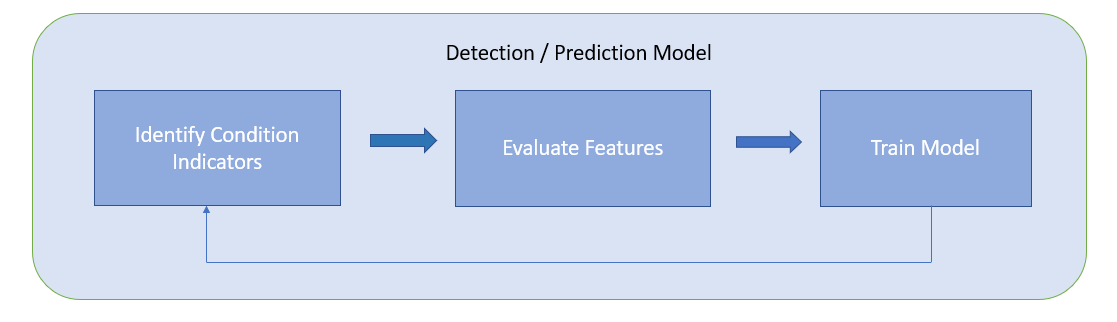

In [61]:
from PIL import Image
Image.open('CMAPSSData/Model.png')

By identifying the condition indicators in the sensor value measurements and operational conditions, we are evaluating the feature importance. With identified features, we are training the model and the target variable(RUL) is predicted. 

In [64]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Feature selection for the model

We have selected the below list of features as they are correlated with the target variable. Few variables are dropped because they are constant with time and they do not have any correlation with the target variable.


In [66]:
features = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']


### Splitting of Train and Test Data

Here, train data is used for the training the machine learning model, and Test/Truth data is used for the validation. 

In [73]:
X_train = aircraft_train_df[features]
y_train = aircraft_train_df['RUL']

X_test = df_test_data[features]
y_test = df_test_data['RUL']

In [75]:
x_train_num = X_train.select_dtypes(include=np.number)


x_train_cat = X_train.select_dtypes(exclude=['number'])

<b>Pipeline and Scalar Selection</b> Since we have only numerical variables in the data, the pipeline is constructed with the numerical data. If there are too many outliers in the data then they will influence the mean and max value or min value. we have used the RobustScaler, It removes the median from the data and scales the data by the InterQuartile Range(IQR). 

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)),('robust_scalar',RobustScaler()),])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent', fill_value=0)),('onehot', OneHotEncoder(handle_unknown='ignore')),])

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(x_train_num.columns)
cat_attribs = list(x_train_cat.columns)


full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs), ("cat",cat_pipeline,cat_attribs)])


x_train_prepared = full_pipeline.fit_transform(X_train)

In [86]:
x_test_prepared = full_pipeline.transform(X_test)

In [88]:
x_train_prepared.shape

(20631, 16)

In [90]:
x_test_prepared.shape

(100, 16)

In [94]:
full_pipeline.get_feature_names_out()


array(['num__op_setting1', 'num__op_setting2', 'num__s2', 'num__s3',
       'num__s4', 'num__s7', 'num__s8', 'num__s9', 'num__s11', 'num__s12',
       'num__s13', 'num__s14', 'num__s15', 'num__s17', 'num__s20',
       'num__s21'], dtype=object)

## Linear Regression 

We have used all the parameters available in the model (intercept, normalize). We have applied the modeling on the training data and test as well. Cross-validation is computed using the Repeated k-fold CV. mean of the neg_mean_absolute_error and std of the scores is calculated. Cross-Validation scores for the 3 repetitions are calculated and are shown below.

In [98]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

model_linear.fit(x_train_prepared, y_train)
model_linear_train_predictions = model_linear.predict(x_train_prepared)
model_linear_test_predictions = model_linear.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_linear_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_linear_test_predictions)))

print("r2_score on Train data :", r2_score(y_train,model_linear_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_linear_test_predictions)) 
print(' ')
print("Cross Validation on Training Data")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_linear, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(model_linear, x_train_prepared, y_train, cv=cv))

Root Mean Squared Error: 32.042741032055
Mean Absolute Error: 25.59380624989196
r2_score on Train data : 0.5794932912981681
r2_score on Test data : 0.40543440405266185
 
Cross Validation on Training Data
MAE: -34.143 (0.717)
Cross validation score: [0.6085437  0.57880665 0.5809385  0.5602833  0.57428878 0.59029114
 0.55806617 0.56772493 0.59564827 0.57106705 0.58910054 0.59017042
 0.58216042 0.59897169 0.59212836 0.58170093 0.55216635 0.56082849
 0.57219257 0.56467575 0.57080056 0.57456876 0.57066856 0.55970919
 0.58155557 0.57477407 0.59454576 0.59137234 0.58073174 0.58952339]


<b>Residuals</b> The Residuals are defined as the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual. Each data point has one residual and the residuals are plotted for the test data. Here, the residulas are shown along the y-axis and the independent variables are shown along the x-axis.

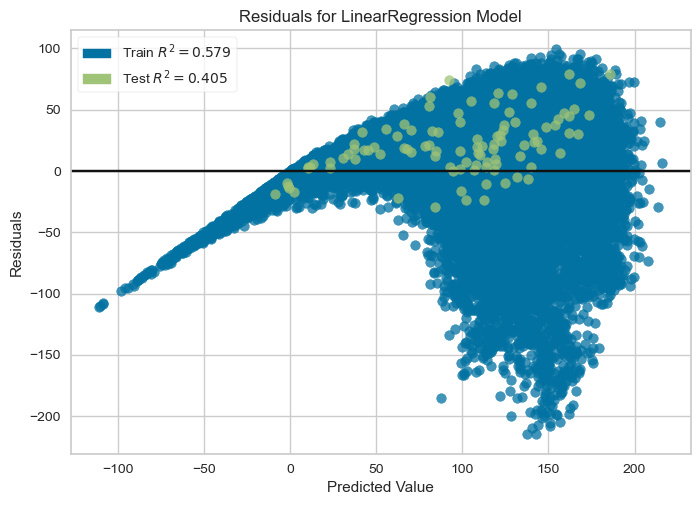

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [100]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_linear, hist=False)

visualizer.fit(x_train_prepared, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test_prepared, y_test)  # Evaluate the model on the test data
visualizer.show()    

<b>Prediction error</b> is nothing but how well the model performs to predict the response variable. We have calculated the prediction and plotted the residuals along the regression line. The below graph shows the prediction error for the test with an r2_score of 0.405.

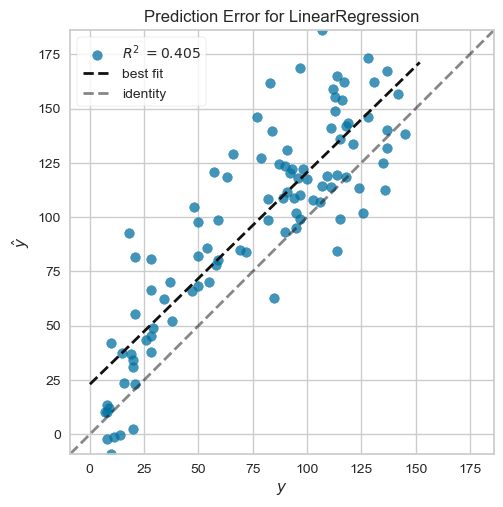

In [102]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model_linear, x_train_prepared, y_train, x_test_prepared, y_test)

<b>Actual vs Prediction</b> The below shows the plotted graph for the engine numbers along the x-axis and the number of cycles along the y-axis. 
The graph shows a plotted comparison of actual and predicted samples.   

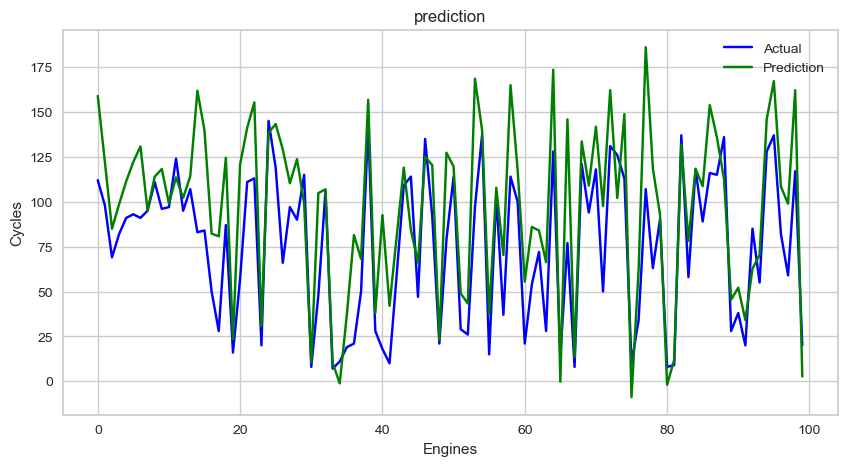

In [104]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(model_linear_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show()

In [110]:
import joblib


joblib.dump(full_pipeline, 'preprocessing_pipeline.pkl')


joblib.dump(model_linear, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

## Polynomial Regression

Polynomial regression extracts a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree. here, the degree is 2 which is the default value. The scores are good with the default value of the degree. K-fold cross-validation is also done with 3 repetitions. 

Polynomial regression with degree 2 has shown better performance than the linear regression model with improved r2_score and RMSE with the test data samples.

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_train_prepared_poly = poly_features.fit_transform(x_train_prepared)
x_test_prepared_poly = poly_features.transform(x_test_prepared)


poly_reg = LinearRegression()
poly_reg.fit(x_train_prepared_poly, y_train)

poly_reg_train_predict = poly_reg.predict(x_train_prepared_poly)
poly_reg_test_predict = poly_reg.predict(x_test_prepared_poly)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, poly_reg_test_predict)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, poly_reg_test_predict)))
print("r2_score on Train data :", r2_score(y_train,poly_reg_train_predict)) 
print("r2_score on Test data :", r2_score(y_test,poly_reg_test_predict)) 
print(' ')
print("Cross Validation on Training Data")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(poly_reg, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(poly_reg, x_train_prepared_poly, y_train, cv=cv))

Root Mean Squared Error: 31.28462096308903
Mean Absolute Error: 23.845612331371015
r2_score on Train data : 0.6269041117496396
r2_score on Test data : 0.4332360076266617
 
Cross Validation on Training Data
MAE: -34.143 (0.717)
Cross validation score: [0.64932443 0.62318191 0.62273919 0.60899291 0.61973574 0.6313079
 0.60394084 0.61572405 0.63251219 0.60914242 0.63408015 0.63376826
 0.62411375 0.6439574  0.62899706 0.61900402 0.60165096 0.59997267
 0.61595728 0.61141103 0.61529384 0.60981144 0.61763886 0.59865034
 0.62418483 0.62197957 0.64024372 0.62824    0.62212432 0.63723807]


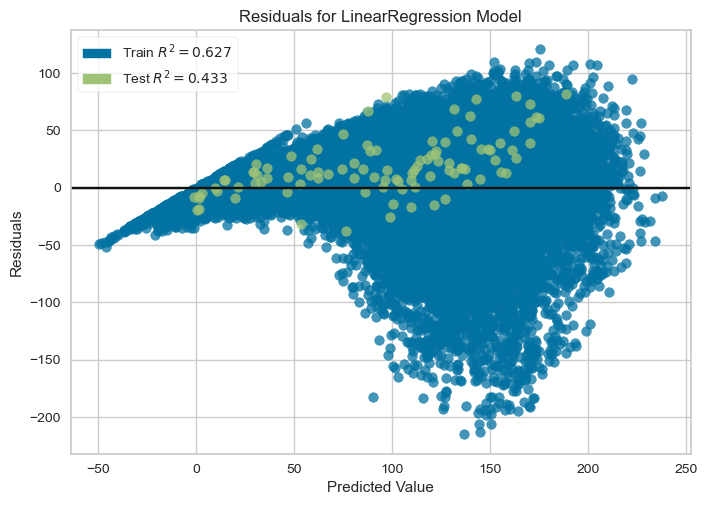

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [116]:
visualizer = ResidualsPlot(poly_reg, hist=False)
visualizer.fit(x_train_prepared_poly, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test_prepared_poly, y_test)  # Evaluate the model on the test data
visualizer.show()  

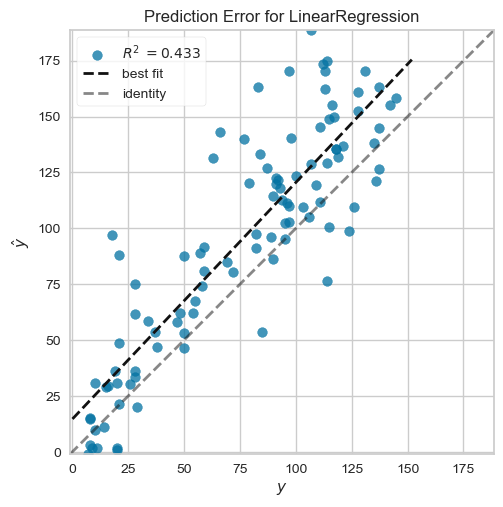

In [118]:
visualizer = prediction_error(poly_reg, x_train_prepared_poly, y_train, x_test_prepared_poly, y_test)

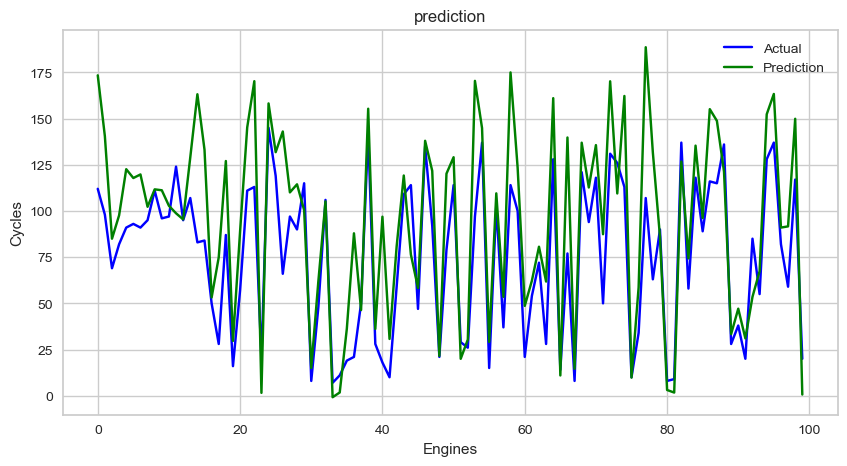

In [120]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(poly_reg_test_predict, color="green")
plt.title('prediction')
plt.ylabel('Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

In [122]:
import joblib
joblib.dump(poly_features, 'poly_transformer.pkl')
joblib.dump(poly_reg, 'poly_regression_model.pkl')


['poly_regression_model.pkl']

## DecisionTree Regression

Decision tree regression is a non-linear model with tree-based learning. The data is somewhat non-linear with the target variable, which is a good model to predict the results. Without parameter tuning the algorithm has produced comparatively good results than the linear regression model. 

Randomized search parameter tuning has been performed on the decision tree regression which improved the results in a good manner. RepeatedKFold cross-validation with neg_mean_absolute_error and cross-validation score has been calculated. cross-validation seems to be giving good scores on training data which is equal to actual scores. 

In [124]:
model_dt = DecisionTreeRegressor(max_depth=7)
model_dt.fit(x_train_prepared, y_train)
model_dt_train_predictions = model_dt.predict(x_train_prepared)
model_dt_test_predictions = model_dt.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_dt_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_dt_test_predictions)))

print("r2_score on Train data :", r2_score(y_train,model_dt_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_dt_test_predictions)) 
print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_dt, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(model_dt, x_train_prepared, y_train, cv=cv))

Root Mean Squared Error: 32.09534866534591
Mean Absolute Error: 24.319067970898036
r2_score on Train data : 0.6247808966557462
r2_score on Test data : 0.4034804909704117
 
MAE: -31.621 (0.682)
Cross validation score: [0.62397856 0.5936928  0.59818302 0.57378783 0.58455255 0.59749817
 0.58070199 0.58644068 0.59025384 0.58897083 0.6070233  0.60093698
 0.59440316 0.61454731 0.59041014 0.59579157 0.56686915 0.580808
 0.59037973 0.59593764 0.58461942 0.58084814 0.5919243  0.58007917
 0.59015873 0.58315971 0.61593919 0.6005443  0.58958829 0.60723695]


In [128]:
import joblib

joblib.dump(model_dt, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

## DecisionTreeRegression with Parameter Tunning.

In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

model_dt = DecisionTreeRegressor()

parametrs = {
    "criterion": ["squared_error", "absolute_error"],
    "min_samples_split": [2, 4, 6, 8, 10],
    "max_depth": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

dt_model = RandomizedSearchCV(model_dt, parametrs, verbose=2, random_state=42, n_jobs=-1)
dt_model.fit(x_train_prepared, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   random_state=42, verbose=2)

In [134]:
dt_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 7,
 'criterion': 'absolute_error'}

In [136]:
dt_model_train_predictions = dt_model.predict(x_train_prepared)
dt_model_test_predictions = dt_model.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,dt_model_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,dt_model_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, dt_model_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, dt_model_test_predictions)))

r2_score on Train data : 0.6075630463415542
r2_score on Test data : 0.4501582516711162
Root Mean Squared Error: 30.814039008218316
Mean Absolute Error: 23.64


In [138]:
import joblib

joblib.dump(dt_model, 'dt_random_search_model.pkl')


['dt_random_search_model.pkl']

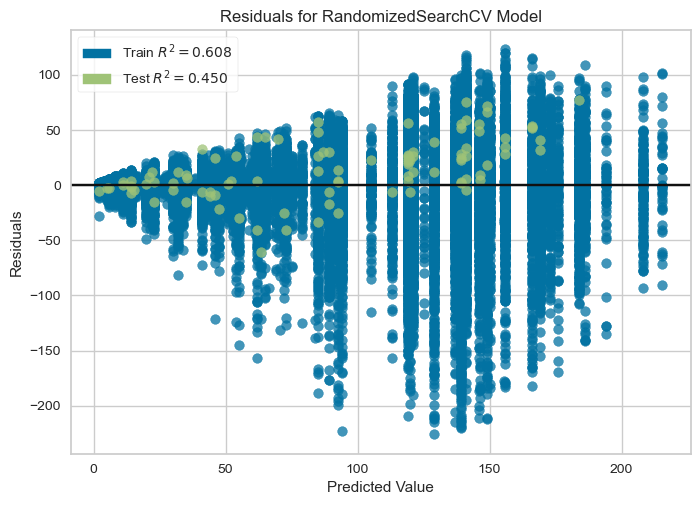

<Axes: title={'center': 'Residuals for RandomizedSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [140]:
visualizer = ResidualsPlot(dt_model, hist=False)
visualizer.fit(x_train_prepared, y_train)  
visualizer.score(x_test_prepared, y_test)  
visualizer.show()  

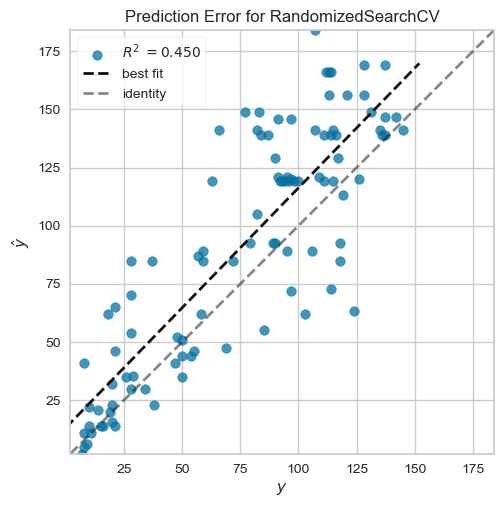

In [142]:
visualizer = prediction_error(dt_model, x_train_prepared, y_train, x_test_prepared, y_test)

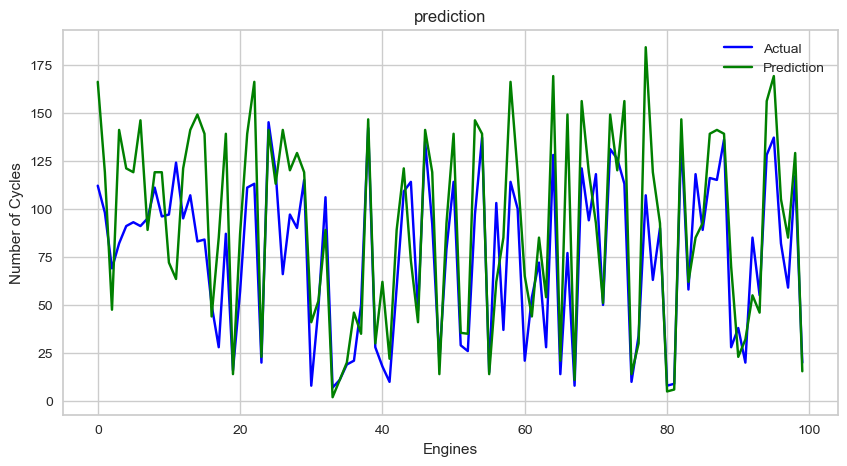

In [144]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(dt_model_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Number of Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

## Lasso Regression

Lasso Regression is a type of regression technique in which both variable selection and regularization happen simultaneously. In this method, a penalty will be applied which will affect the value of the coefficient of regression. The results are produced equally with the linear regression model. The data seems to be the same with no change even though we have applied with the parameter alpha (0.01).

As the tuning parameter increases the bias increases and when the tuning parameter decreases variance increases. RepeatedKFold cross-validation is performed which is giving good scores on training data which is equal to actual scores. 

In [147]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)

model_lasso.fit(x_train_prepared, y_train)
model_lasso_train_predictions = model_lasso.predict(x_train_prepared)
model_lasso_test_predictions = model_lasso.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_lasso_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_lasso_test_predictions)))

print("r2_score on Train data :", r2_score(y_train,model_lasso_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_lasso_test_predictions)) 
print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lasso, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(model_lasso, x_train_prepared, y_train, cv=cv))

Root Mean Squared Error: 32.04002070511949
Mean Absolute Error: 25.593458887488353
r2_score on Train data : 0.5794931052623815
r2_score on Test data : 0.40553535322847434
 
MAE: -34.143 (0.717)
Cross validation score: [0.60851565 0.57879091 0.5809357  0.56030258 0.57430205 0.59029501
 0.55807059 0.56773379 0.59566189 0.57108391 0.58909338 0.59016744
 0.5821707  0.59897488 0.59211532 0.58171435 0.55217609 0.5608538
 0.57217435 0.56466251 0.57080703 0.57457964 0.57065806 0.55973113
 0.58157013 0.5747839  0.59454514 0.59136309 0.58073403 0.58952857]


In [149]:
import joblib
joblib.dump(model_lasso, 'lasso_model.pkl')


['lasso_model.pkl']

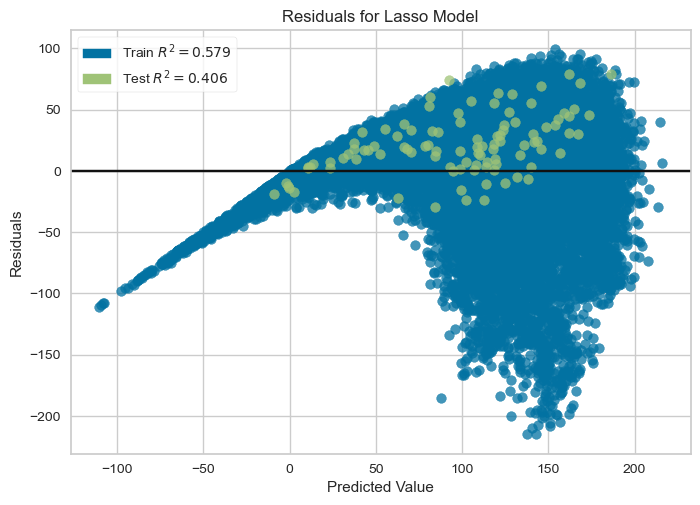

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [151]:
visualizer = ResidualsPlot(model_lasso, hist=False)
visualizer.fit(x_train_prepared, y_train)
visualizer.score(x_test_prepared, y_test) 
visualizer.show() 

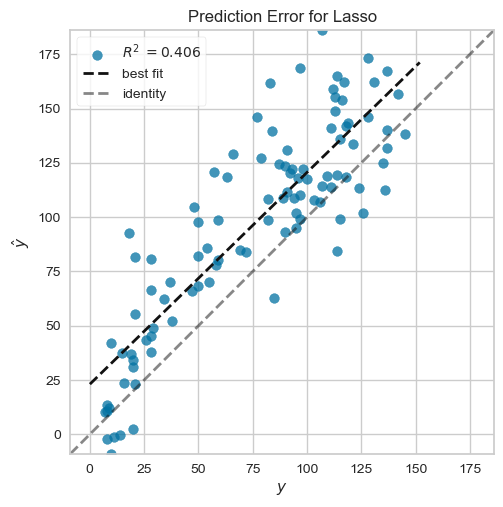

In [153]:
visualizer = prediction_error(model_lasso, x_train_prepared, y_train, x_test_prepared, y_test)

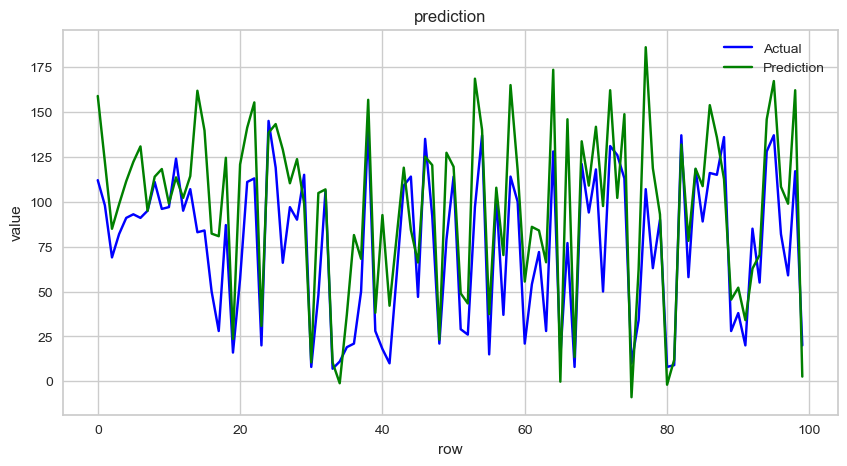

In [155]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(model_lasso_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

## Randomforest Regression

Random forest regression is an ensemble method that is capable of constructing a multitude of decision trees for performing a regression task which is called Bootstrap aggregation (bagging). It involves training each decision tree on a different data sample. Random forest regression without parameter tuning has given relatively poor results than the normal linear models. 

RandamisedSearch parameter tuning has given good results and performed better than any other model giving test scores(r2_score) highest(0.4937). 

In [158]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor(max_depth=7)
randf.fit(x_train_prepared, y_train)
model_random_train_predictions = randf.predict(x_train_prepared)
model_random_test_predictions = randf.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,model_random_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_random_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_random_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_random_test_predictions)))

print("Cross validation score:", cross_val_score(randf, x_train_prepared, y_train, cv=10))

r2_score on Train data : 0.6504200587221616
r2_score on Test data : 0.42184029278981916
Root Mean Squared Error: 31.597569880074037
Mean Absolute Error: 23.933655211788974
Cross validation score: [0.71842672 0.70802669 0.53224998 0.72150945 0.73508447 0.543687
 0.40658531 0.66427449 0.55555151 0.55014458]


## Randomforest Regression with parameter Tuning

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10, 30, 50, 70, 100],
            "max_features"      : [1, 2, 3, 4, 5],
            "min_samples_split" : [2,3, 5, 7, 9],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(model_rf, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train_prepared, y_train)
model_random_train_predictions = grid.predict(x_train_prepared)
model_random_test_predictions = grid.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,model_random_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_random_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_random_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_random_test_predictions)))

r2_score on Train data : 0.8697147467650799
r2_score on Test data : 0.46075702953263753
Root Mean Squared Error: 30.515607362688783
Mean Absolute Error: 22.604840487486367


In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

randf = RandomForestRegressor(random_state = 42)
n_estimators = [10, 50, 75, 100]
max_features = [1, 2, 3, 4]
max_depth = [1, 2, 3, 4, 5]
min_samples_split = [1, 2, 3, 4, 5]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(randf,random_grid, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train_prepared, y_train)
rf_random_train_predictions = rf_random.predict(x_train_prepared)
rf_random_test_predictions = rf_random.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,rf_random_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,rf_random_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, rf_random_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, rf_random_test_predictions)))

print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf_random, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
r2_score on Train data : 0.6117518993960955
r2_score on Test data : 0.5154484446254719
Root Mean Squared Error: 28.926758384046234
Mean Absolute Error: 22.80999999028916
 
MAE: -31.812 (0.656)


In [164]:
rf_random.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'max_features': 2,
 'max_depth': 5,
 'bootstrap': True}

In [166]:
import joblib


joblib.dump(rf_random, 'rf_randomized_search_model.pkl')
best_rf_model = rf_random.best_estimator_
joblib.dump(best_rf_model, 'best_rf_model.pkl')


['best_rf_model.pkl']

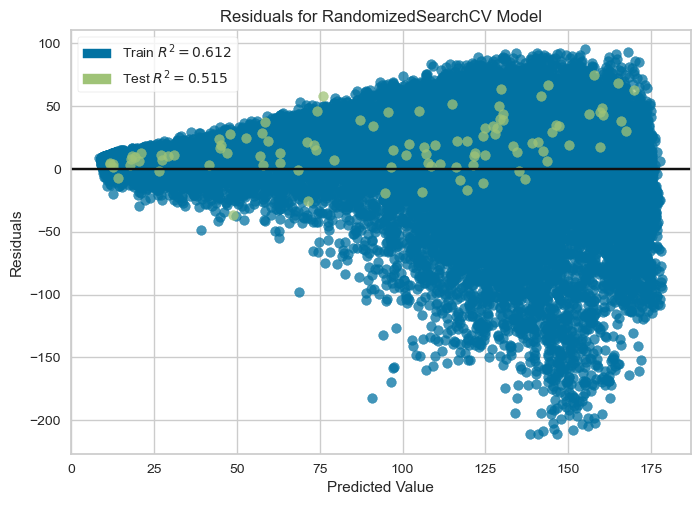

In [168]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(rf_random, x_train_prepared, y_train, x_test_prepared, y_test, hist=False)

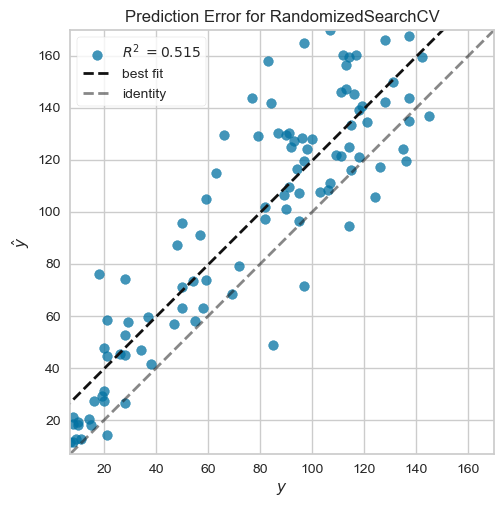

In [170]:
visualizer = prediction_error(rf_random, x_train_prepared, y_train, x_test_prepared, y_test)

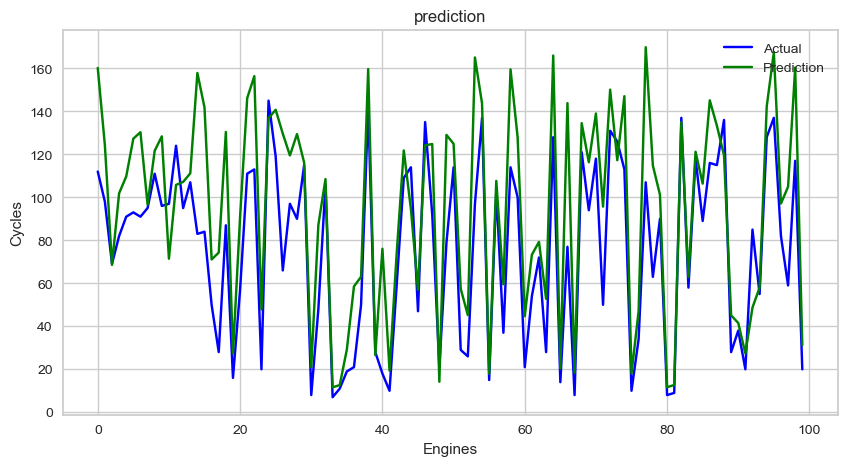

In [172]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(rf_random_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

## LGBM Regressor with parameter tuning

LightGBM is a gradient boosting tree-based learning algorithm which is distributed and efficient. we have tried implementing the LGBM regressor with some parameters and we could see some improved results as this is a non-linear algorithm. the RMSE score has been improved compared to the linear models. 

RepeatedKFold cross-validation scores for 3 repetitions have been taken and cross-validation scores are calculated. 

In [174]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(max_depth=7, num_leaves = 2)

model_lgbm.fit(x_train_prepared, y_train)
model_lgbm_train_predictions = model_lgbm.predict(x_train_prepared)
model_lgbm_test_predictions = model_lgbm.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_lgbm_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_lgbm_test_predictions)))

print("Accuracy on Train data :", r2_score(y_train,model_lgbm_train_predictions)) 
print("Accuracy on Test data :", r2_score(y_test,model_lgbm_test_predictions)) 
print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lgbm, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation accuracy:", cross_val_score(model_lgbm, x_train_prepared, y_train, cv=10))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 20631, number of used features: 16
[LightGBM] [Info] Start training from score 107.807862
Root Mean Squared Error: 31.935127036621545
Mean Absolute Error: 25.14717832751449
Accuracy on Train data : 0.6149852619252605
Accuracy on Test data : 0.40942133740430864
 
MAE: -32.006 (0.670)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 18567, number of used features: 16
[LightGBM] [Info] Start training from score 107.223838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `f

In [188]:
import joblib

joblib.dump(model_lgbm, 'model_lgbm.pkl')


['model_lgbm.pkl']

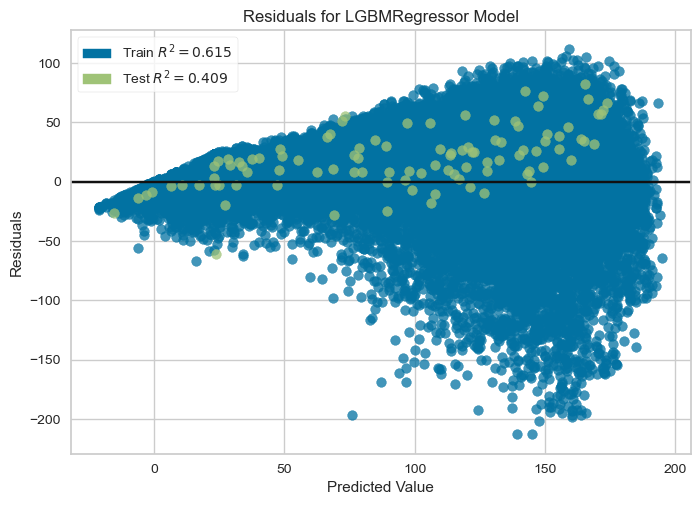

In [178]:
viz = residuals_plot(model_lgbm, x_train_prepared, y_train, x_test_prepared, y_test, hist=False)

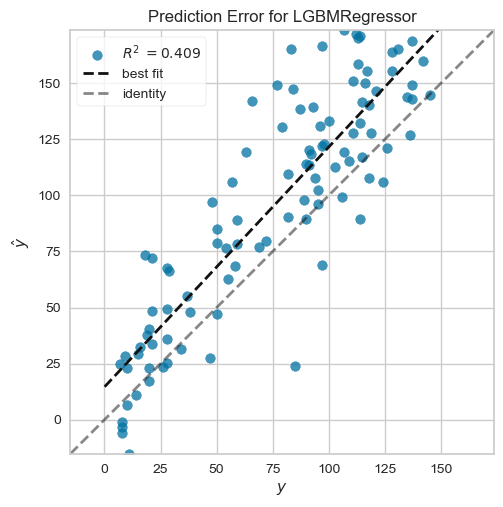

In [180]:
visualizer = prediction_error(model_lgbm, x_train_prepared, y_train, x_test_prepared, y_test)

## XGBRegressor with parameter tuning

XGBoost is an optimized distributed gradient boosting algorithm which is highly efficient and flexible. which performs in parallel tree-based learning. the model is trained with parameters and the model seems to be performed a bit slightly less than other non-linear models.

In [184]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(learning_rate =0.1, n_estimators=100, max_depth=7, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=27)
model_xgb.fit(x_train_prepared, y_train)
model_xgb_train_predictions = model_xgb.predict(x_train_prepared)
model_xgb_test_predictions = model_xgb.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_xgb_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_xgb_test_predictions)))

print("Accuracy on Train data :", r2_score(y_train,model_xgb_train_predictions)) 
print("Accuracy on Test data :", r2_score(y_test,model_xgb_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(model_xgb, x_train_prepared, y_train, cv=10))

Root Mean Squared Error: 34.37882258575492
Mean Absolute Error: 24.810091018676758
Accuracy on Train data : 0.7824758887290955
Accuracy on Test data : 0.3155803680419922
Cross validation accuracy: [0.72324431 0.70069242 0.54678881 0.70022428 0.73061585 0.52238703
 0.38913417 0.66861224 0.55441427 0.5619784 ]


In [186]:
import joblib

joblib.dump(model_xgb, 'model_xgb.pkl')


['model_xgb.pkl']

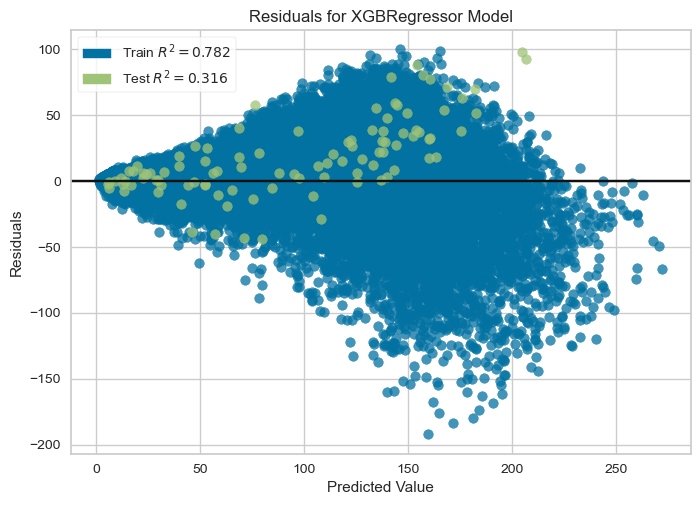

In [190]:
viz = residuals_plot(model_xgb, x_train_prepared, y_train, x_test_prepared, y_test, hist=False)

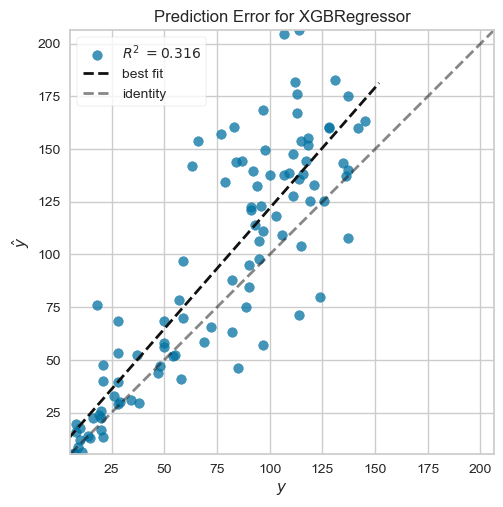

In [192]:
visualizer = prediction_error(model_xgb, x_train_prepared, y_train, x_test_prepared, y_test)

## CatBoostRegressor with parameter Tuning

CatBoost is a machine learning algorithm that uses gradient boosting on tree-based learning. The model performed well comparatively with a good test score(0.4343). 

In [195]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(verbose=0, n_estimators=100, max_depth=7,learning_rate =0.1)
model_cat.fit(x_train_prepared, y_train)
model_cat_train_predictions = model_cat.predict(x_train_prepared)
model_cat_test_predictions = model_cat.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_cat_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_cat_test_predictions)))

print("Accuracy on Train data :", r2_score(y_train,model_cat_train_predictions)) 
print("Accuracy on Test data :", r2_score(y_test,model_cat_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(model_cat, x_train_prepared, y_train, cv=10))

Root Mean Squared Error: 31.25340902017025
Mean Absolute Error: 22.8227389118037
Accuracy on Train data : 0.6679950488043246
Accuracy on Test data : 0.43436633815196046
Cross validation accuracy: [0.72878315 0.71272761 0.55860583 0.7220684  0.7531919  0.53876503
 0.39445081 0.67997691 0.56439028 0.57389073]


In [197]:
import joblib

joblib.dump(model_cat, 'model_catboost.pkl')


['model_catboost.pkl']

## Actual vs predicted output values for the RandomForest Regression model.

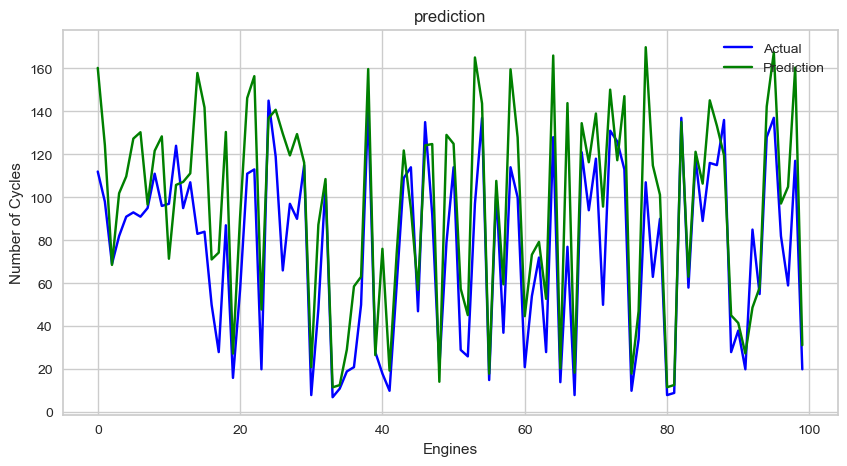

In [199]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(rf_random_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Number of Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

## Results Comparision

As discussed in the problem statement it is a Regression problem. Here, we have to find the remaining useful life of an engine based on the generated sensor data for different operational conditions. 

From the Exploratory Data Analysis, we can infer that we have enough attributes for predicting the target variable (RUL) of an engine. we have done various visualizations describing the relationship between variables. 

Based on the known variables feature selection has been done and selected features are used in implementing the model. 

Algorithms implemented for finding the RUL prediction.

1. Linear Regression
2. Decision tree Regression
3. Polynomial Regression
4. Lasso Regression 
5. RandomForest Regression 
6. LGBM Regression
7. XGBoost Regression
8. CatBoost Regressor 

Among the models, we have linear models and non-linear models. The data is non-linear with the target variable. As per the results, non-linear models performed better than linear models.
Best parameters for Random Forest Regression is {'n_estimators': 75,
 'min_samples_split': 2,
 'max_features': 2,
 'max_depth': 5,
 'bootstrap': True}

RANDOM FOREST REGRESSION outperformed all the other models with an r2_score of 0.5154 and with an RMSE of ±28.96


|  Model                  | r2_score (Train) | r2-score (Test)  | RMSE      | MAE          | 
|-------------------------|------------------|------------------|-----------|--------------|
| Linear Regression       | 0.5794           | 0.4054           |  32.04    | 25.59        |
| Polynomial Regression   | 0.6269           | 0.4332           |  31.28    | 23.84        |
| Decisiontree Regression | 0.6075           | 0.4501           |  30.81    | 23.64        |
| Lasso Regression        | 0.5794           | 0.4054           |  32.04    | 25.59        |
| Randomforest Regression | 0.6117           | 0.5154           |  28.92    | 22.80        | 
| LGBM Regression         | 0.6149           | 0.4094           |  31.93    | 25.14        |
| XGBRegression           | 0.7824           | 0.3155           |  34.37    | 24.81        |
| CatBoostRegresson       | 0.6679           | 0.4343           |  31.25    | 22.82        |



## Conclusion

Damage propagation model/Predictive maintenance is very useful in many industries for estimating the maintenance period for in-service equipment. 
Our, solution is for the aircraft run-to-failure period estimation based on the simulated dataset. This analysis can be used in the aircraft or defense industries for better maintenance strategies.

As future work, we can implement the same models for estimating the Remaining Useful Life of certain parts with limited life before it’s failure can be predicted by extending this approach for other parts.

The work can be extended with Neural Network Models to predict RUL based on input sensor measurements with larger datasets. So that optimized maintenance can be planned and downtime for the aircraft can be reduced. 
